# 03. Training and Test

Train/validate and test different models for each resampling strategy.

## 01. Imports and Settings

In [1]:
# Imports
from catboost import CatBoostClassifier
from IPython.display import display
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os
import pandas as pd
import sys
import warnings

# libs
sys.path.append(os.path.abspath(os.path.abspath(
    os.path.join(os.path.expanduser("~") + "/remy-project/"))))  # path
from libs.hyper_optimization import (
    HyperParamCatBoostClassifier,
    HyperParamLightGBMClassifier,
    HyperParamXGBoostClassifier,
    HyperParamRandomForestClassifier
)  # hyper_optimization.py
from libs.model_evaluation import (
    plot_roc_curve,
    plot_pr_curve,
    train_validate_model,
    test_model,
    plot_feature_importances,
    plot_weights
)  # model_evaluation.py
from libs.utils import split_X_y, save_object  # utils.py


# Ignore warnings
warnings.filterwarnings("ignore")

# Pandas settings
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 150)  # Increase column width

# Default path
DATA_PATH = "data/"
BIN_PATH = "bin/"
REPORTS_PATH = "reports/"

## 02. Load Data

In [2]:
# Dictionary to save models and their metrics
resampled = dict()

# Initializing for each resampling technique
for strategy in ["ONLY_RUS", "ROS", "SMOTENC", "CTGAN"]:
    resampled[strategy] = dict()
    resampled[strategy]["data"] = pd.DataFrame()
    
    for clf in ["rf", "xgb", "lgb", "catboost", "xgb_boruta"]:  # For each classifier type...
        resampled[strategy][clf] = {"obj": object(), "train_metrics": {}, "test_metrics": {}}

In [3]:
# # Load training data from distinct resampling techniques
resampled["ONLY_RUS"]["data"] = pd.read_csv(f"{DATA_PATH}resampling/train_data_ONLY_RUS.csv")
resampled["ROS"]["data"] = pd.read_csv(f"{DATA_PATH}resampling/train_data_ROS.csv")
resampled["SMOTENC"]["data"] = pd.read_csv(f"{DATA_PATH}resampling/train_data_SMOTENC.csv")
resampled["CTGAN"]["data"] = pd.read_csv(f"{DATA_PATH}resampling/train_data_CTGAN.csv")

# Test data
test_df = pd.read_csv(f"{DATA_PATH}test_data.csv")
# Split test data into X and y
X_test, y_test = split_X_y(test_df, "is_target", [])

In [4]:
# Categorial columns
categorical_cols = ["join_s", "sch_s", "sch_r"]
# Numerical columns
numerical_cols = ["adv_r", "data_s", "dist_ch_to_bs", "dist_to_ch",
                  "expaned_energy", "rank", "send_code", "who_ch"]
features = categorical_cols + numerical_cols
# Selected features in Boruta
boruta_features = ["join_s", "who_ch", "data_s", "expaned_energy", "dist_ch_to_bs", "send_code", "rank", "adv_r"]

## 03. Train Models

### 03.1. CatBoost


>> ONLY_RUS

[CatBoostClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.1 +- 0.15', 'Recall': '97.15 +- 0.23', 'F1': '97.12 +- 0.18', 'ROC_AUC': '99.9 +- 0.01', 'Log_Loss': '0.0584 +- 0.0031'}

Model Test: {'Precision': "81.04, {'0': 100.0, '1': 67.88, '2': 92.49, '3': 63.79}", 'Recall': "98.23, {'0': 97.25, '1': 99.76, '2': 99.85, '3': 96.07}", 'F1': "88.02, {'0': 98.61, '1': 80.79, '2': 96.03, '3': 76.67}", 'ROC_AUC': '99.91', 'Log_Loss': '0.116'}



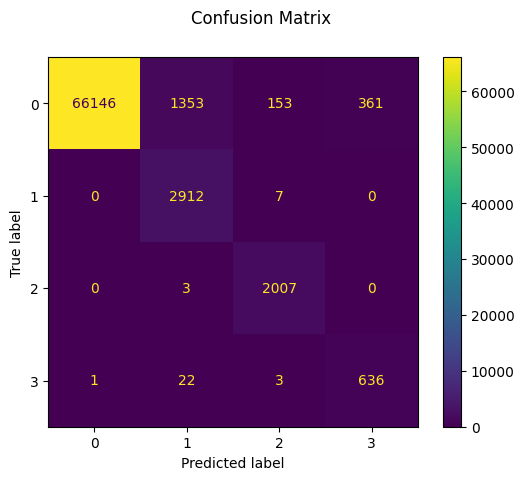

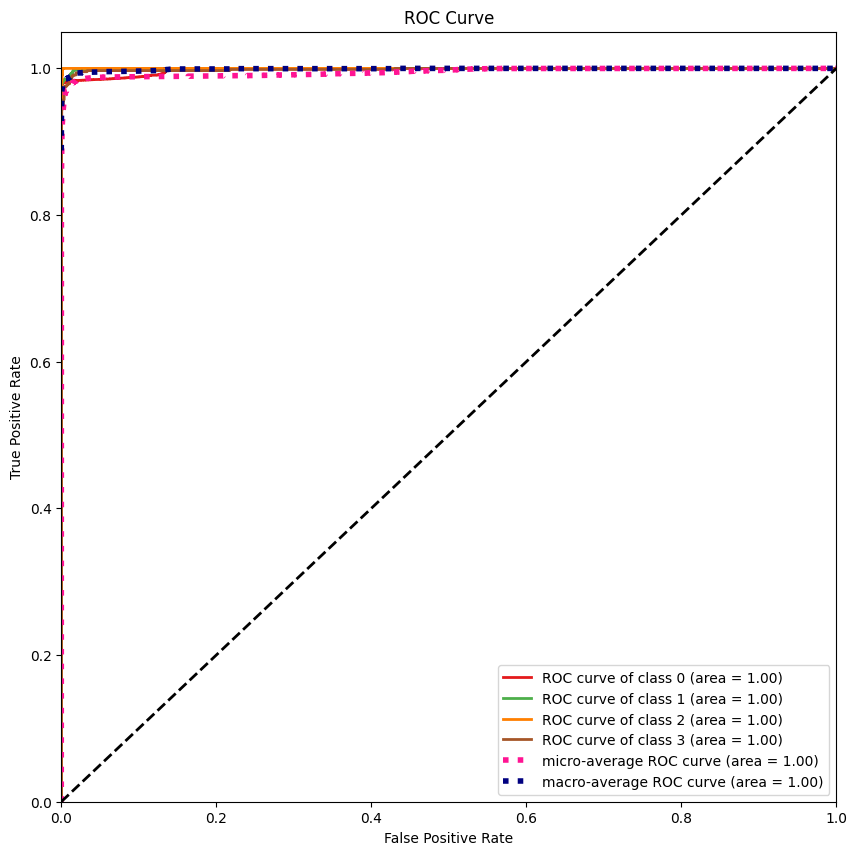

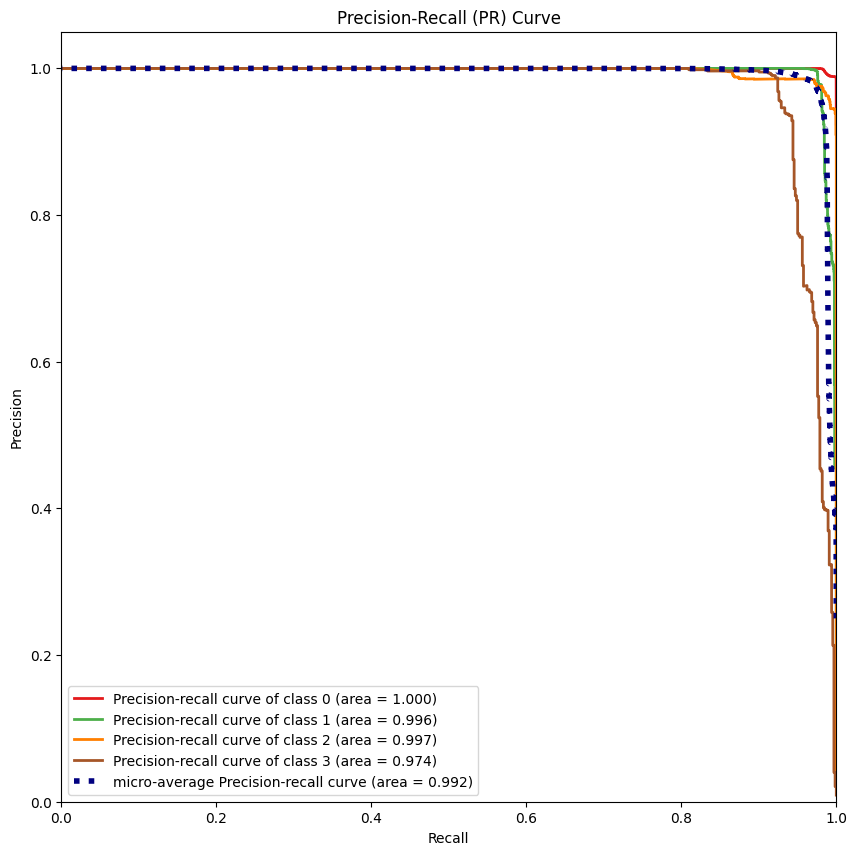

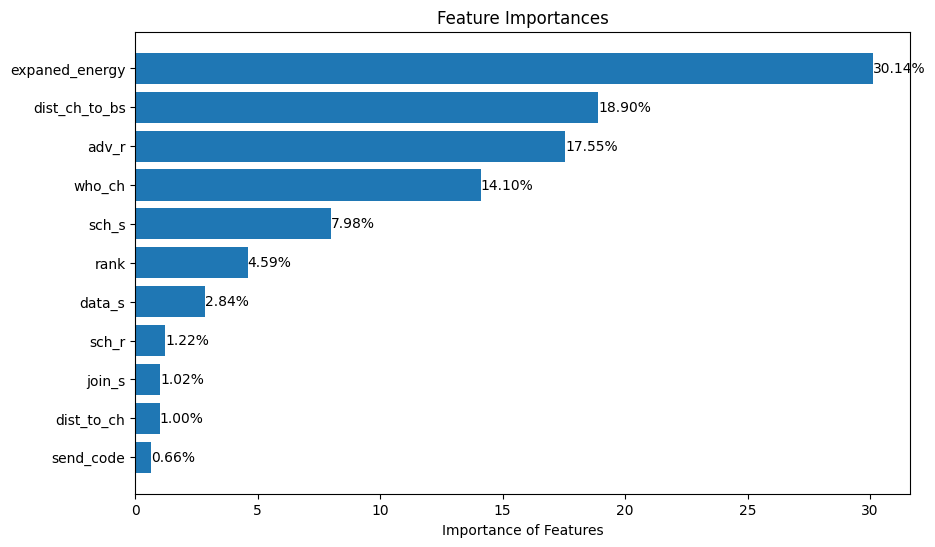






>> ROS

[CatBoostClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.96 +- 0.1', 'Recall': '97.96 +- 0.17', 'F1': '97.95 +- 0.11', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.054 +- 0.0031'}

Model Test: {'Precision': "80.74, {'0': 100.0, '1': 66.41, '2': 92.1, '3': 64.46}", 'Recall': "98.46, {'0': 97.1, '1': 99.76, '2': 99.7, '3': 97.28}", 'F1': "87.89, {'0': 98.53, '1': 79.74, '2': 95.75, '3': 77.54}", 'ROC_AUC': '99.9', 'Log_Loss': '0.1295'}



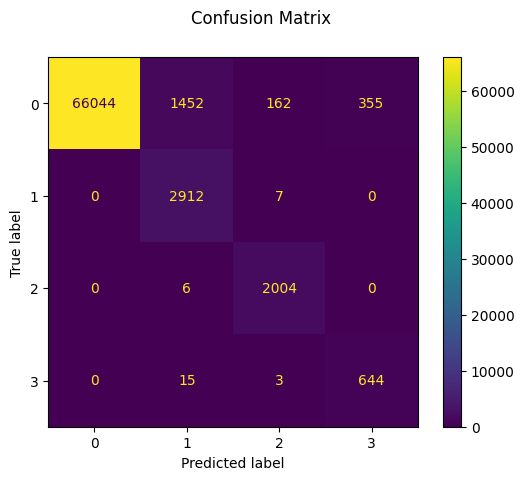

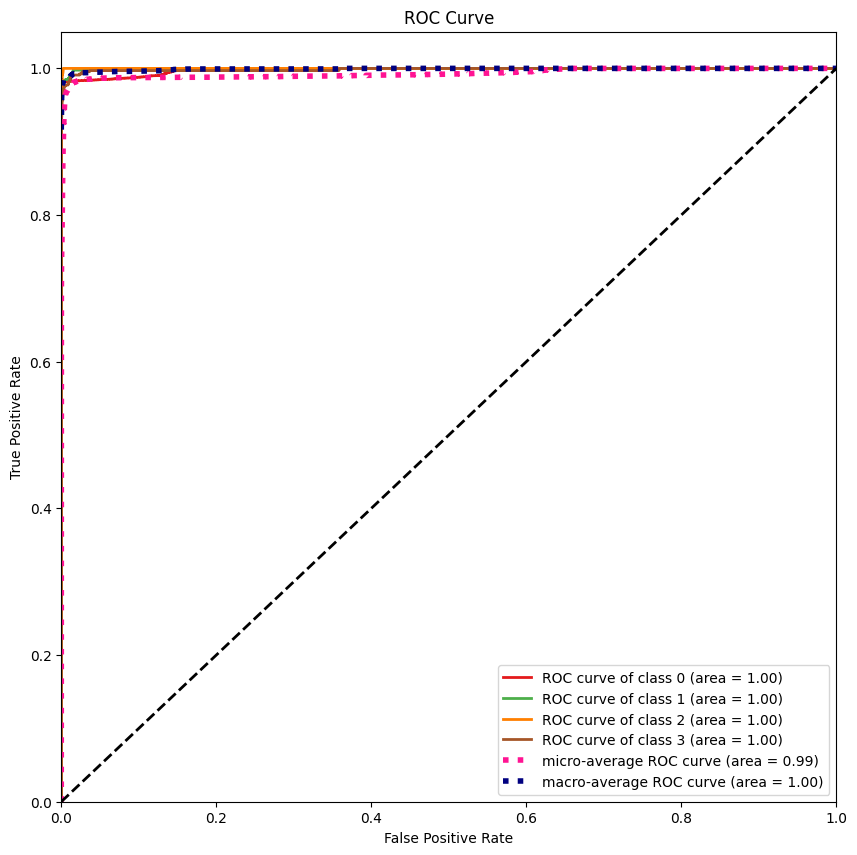

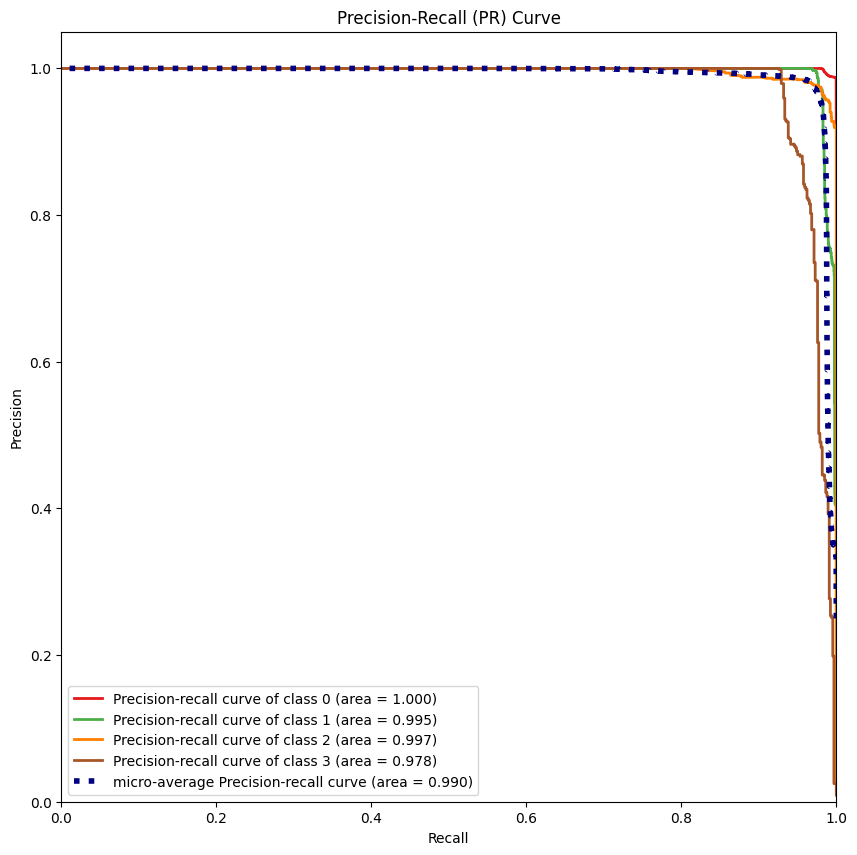

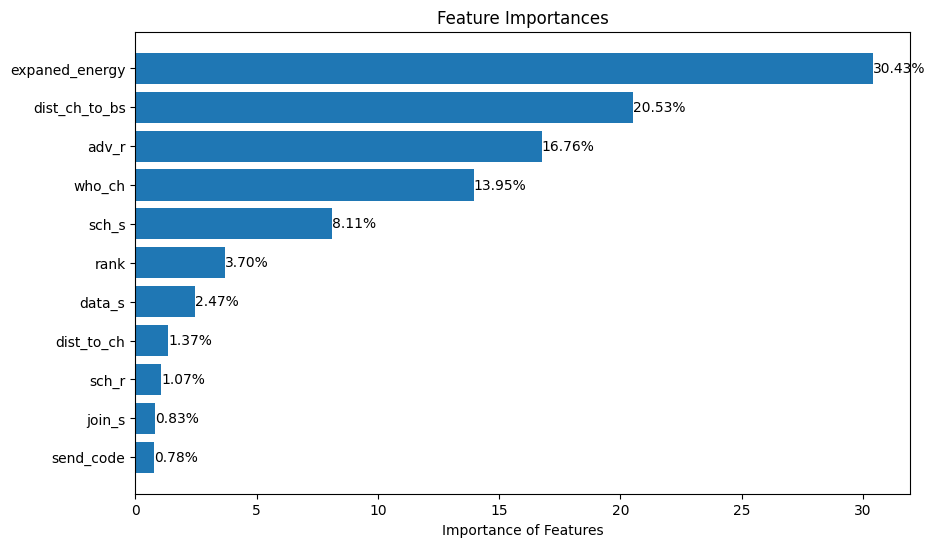






>> SMOTENC

[CatBoostClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.6 +- 0.14', 'Recall': '97.56 +- 0.28', 'F1': '97.57 +- 0.17', 'ROC_AUC': '99.91 +- 0.01', 'Log_Loss': '0.0598 +- 0.0024'}

Model Test: {'Precision': "77.76, {'0': 100.0, '1': 64.76, '2': 91.69, '3': 54.59}", 'Recall': "98.18, {'0': 96.68, '1': 99.73, '2': 99.35, '3': 96.98}", 'F1': "85.52, {'0': 98.31, '1': 78.53, '2': 95.37, '3': 69.86}", 'ROC_AUC': '99.88', 'Log_Loss': '0.1359'}



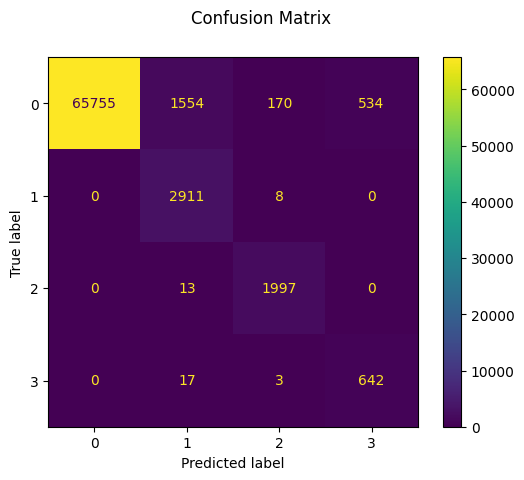

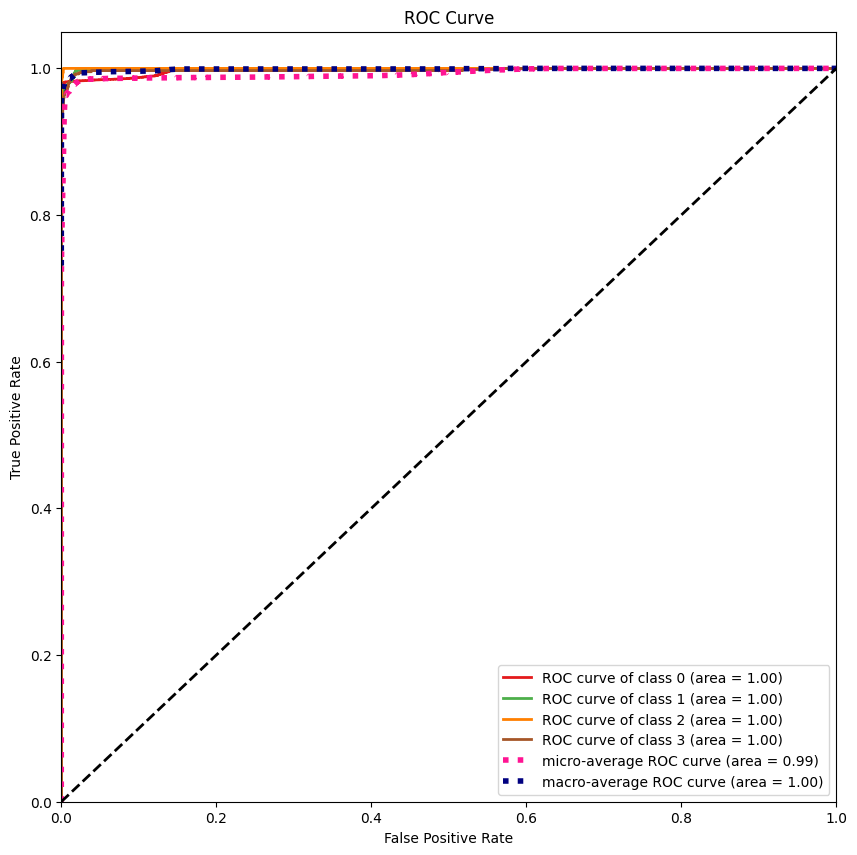

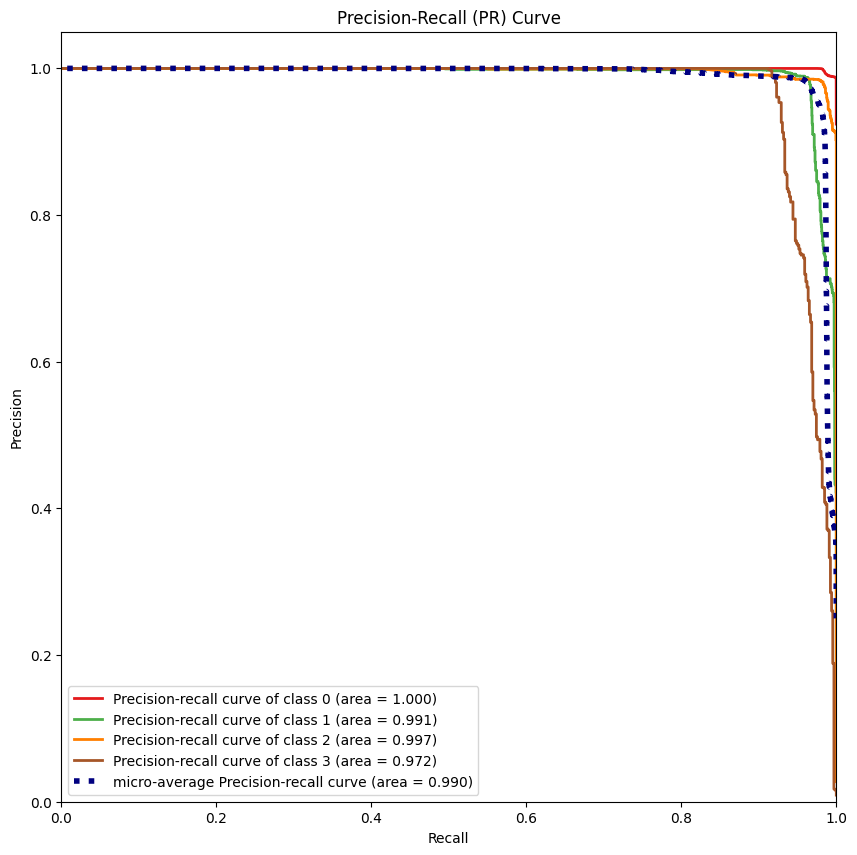

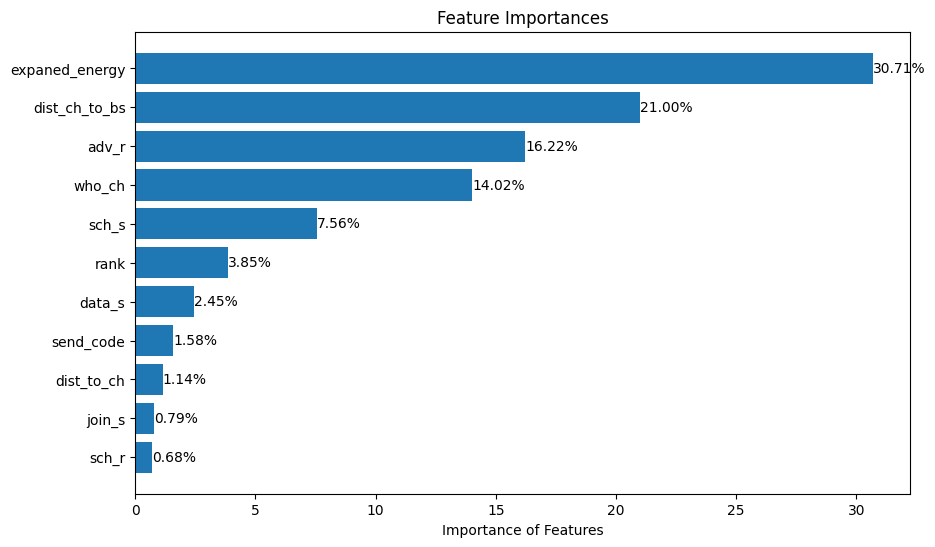






>> CTGAN

[CatBoostClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.52 +- 0.1', 'Recall': '97.35 +- 0.26', 'F1': '97.43 +- 0.18', 'ROC_AUC': '99.91 +- 0.01', 'Log_Loss': '0.0573 +- 0.0026'}

Model Test: {'Precision': "79.57, {'0': 100.0, '1': 70.04, '2': 89.69, '3': 58.57}", 'Recall': "97.98, {'0': 97.24, '1': 99.73, '2': 99.95, '3': 95.02}", 'F1': "86.97, {'0': 98.6, '1': 82.29, '2': 94.54, '3': 72.47}", 'ROC_AUC': '99.9', 'Log_Loss': '0.1152'}



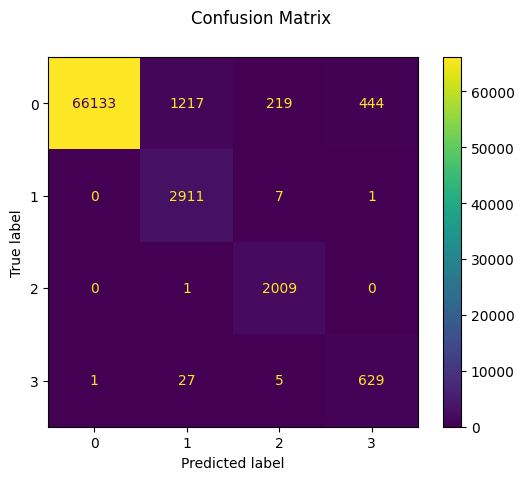

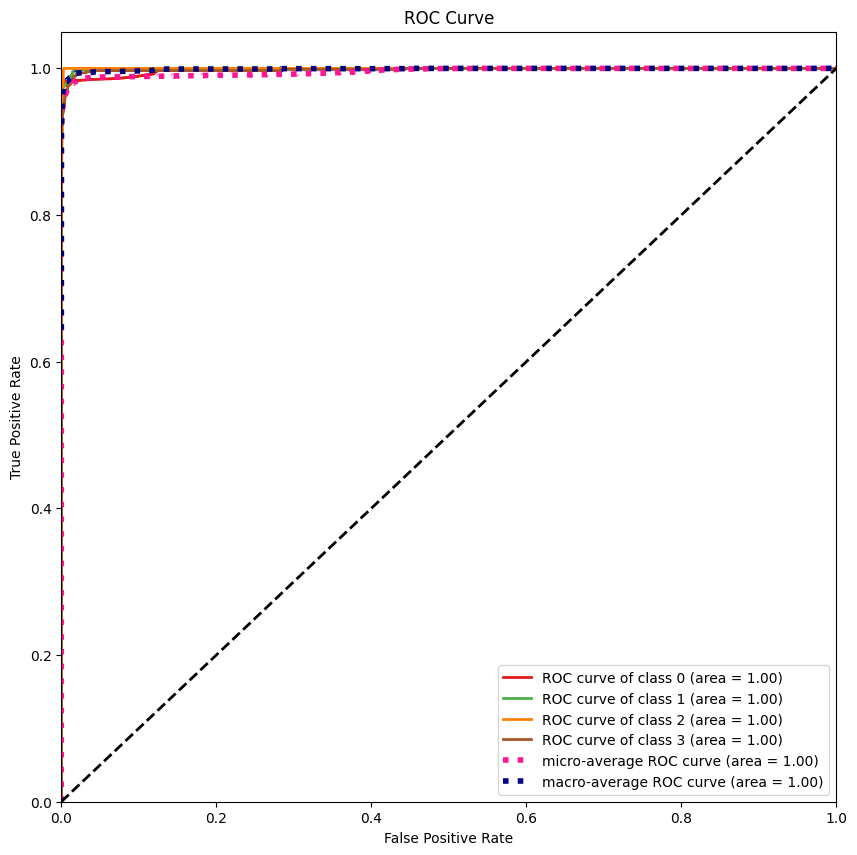

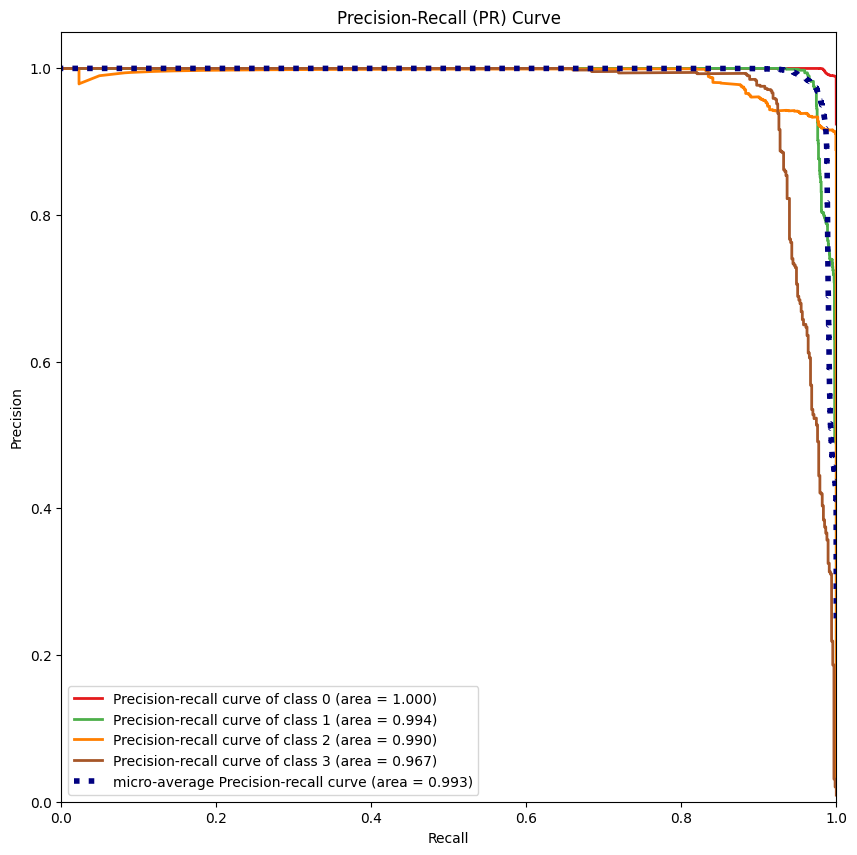

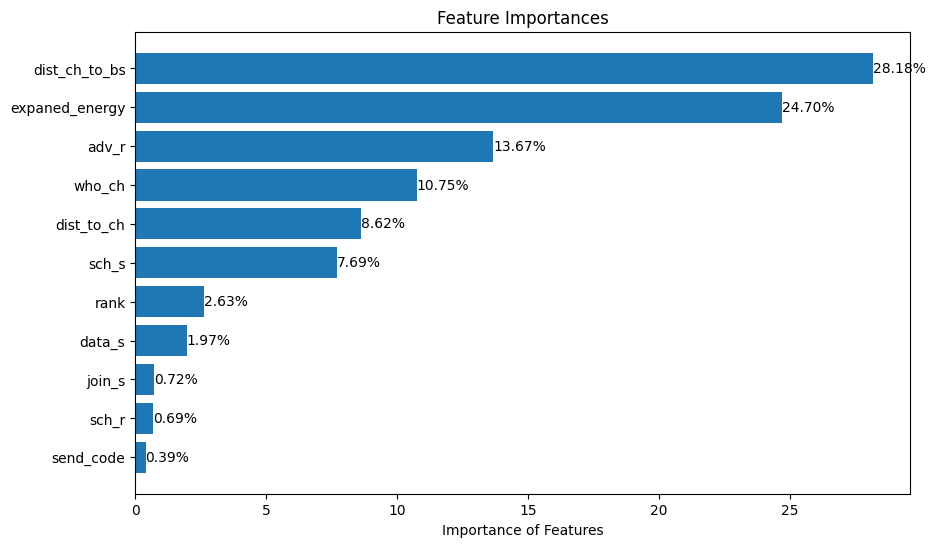

In [5]:
for strategy in ["ONLY_RUS", "ROS", "SMOTENC", "CTGAN"]:  # For each resampling strategy...
    print(f"\n>> {strategy}\n")
    # Split into X and y
    X_train, y_train = split_X_y(resampled[strategy]["data"], "is_target", [])
    
    # Optimizing hyperparameters...
    model, best_hyperparams, _ = HyperParamCatBoostClassifier(
        X_train, y_train, n_trials=10).run()

    # Cross-Validation with k = 5
    resampled[strategy]["catboost"]["train_metrics"] = train_validate_model(model, X_train, y_train)
    # Training model...
    model = CatBoostClassifier(**best_hyperparams, cat_features=categorical_cols, logging_level="Silent")
    model.fit(X_train, y_train)
    # Model testing
    resampled[strategy]["catboost"]["test_metrics"] = test_model(model, X_test, y_test)
    print("\n")
    # ROC and PR Curves
    plot_roc_curve(model, X_test, y_test)
    print("\n")
    plot_pr_curve(model, X_test, y_test)
    # Save trained model
    resampled[strategy]["catboost"]["obj"] = model
    save_object(resampled[strategy]["catboost"]["obj"], f"{BIN_PATH}catboost_{strategy}_obj")
    print("\n")
    
    # Feature Importance
    plot_feature_importances(resampled[strategy]["catboost"]["obj"], features, top_n=len(features))
    # Weights
    plot_weights(resampled[strategy]["catboost"]["obj"], features, top_n=len(features))
    print("\n\n\n")

### 03.2. LightGBM


>> ONLY_RUS

[LGBMClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.75 +- 0.15', 'Recall': '97.9 +- 0.26', 'F1': '97.82 +- 0.19', 'ROC_AUC': '99.94 +- 0.01', 'Log_Loss': '0.0446 +- 0.0037'}

Model Test: {'Precision': "87.38, {'0': 100.0, '1': 67.24, '2': 99.4, '3': 82.9}", 'Recall': "98.28, {'0': 97.78, '1': 99.69, '2': 98.96, '3': 96.68}", 'F1': "91.91, {'0': 98.87, '1': 80.31, '2': 99.18, '3': 89.26}", 'ROC_AUC': '99.94', 'Log_Loss': '0.1032'}



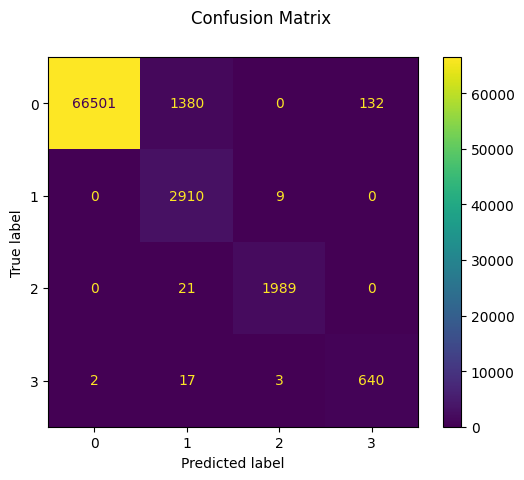

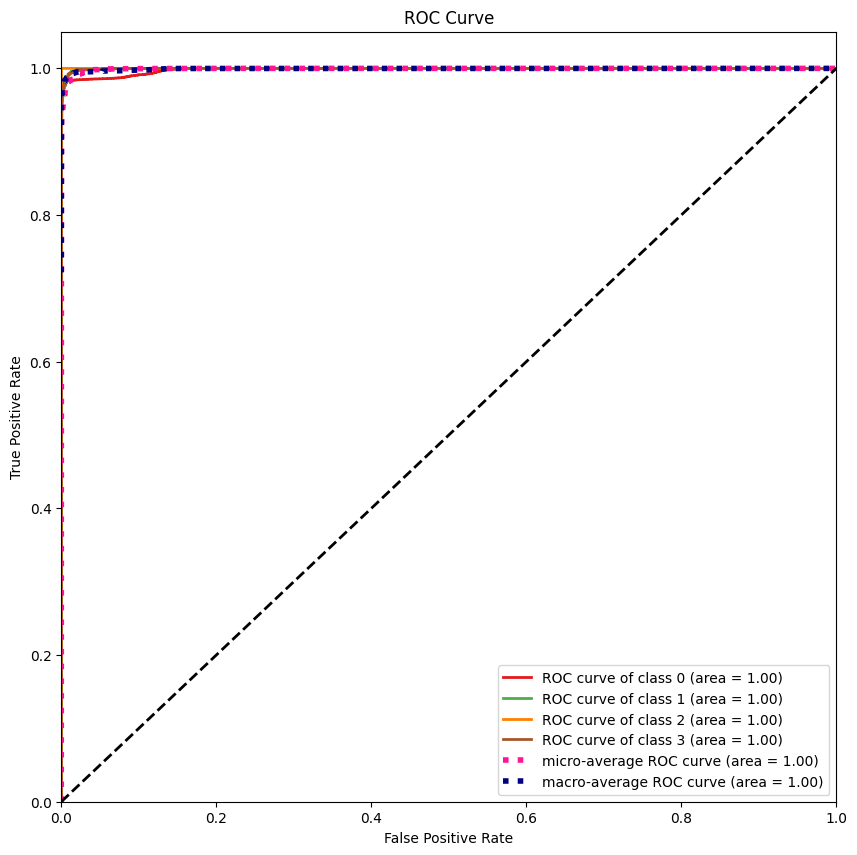

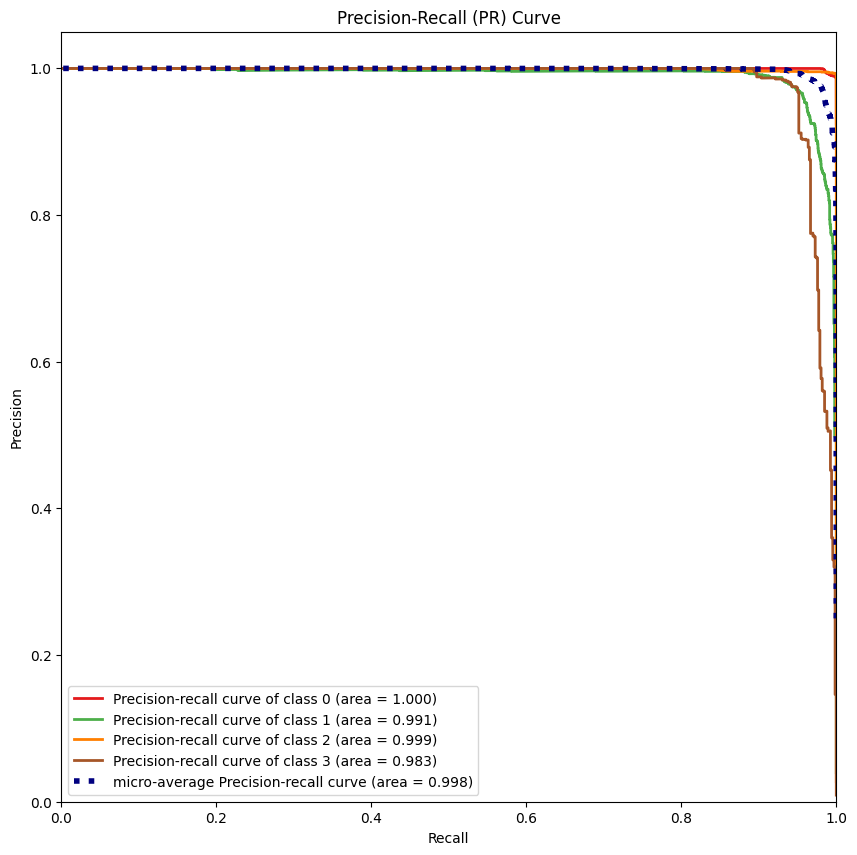

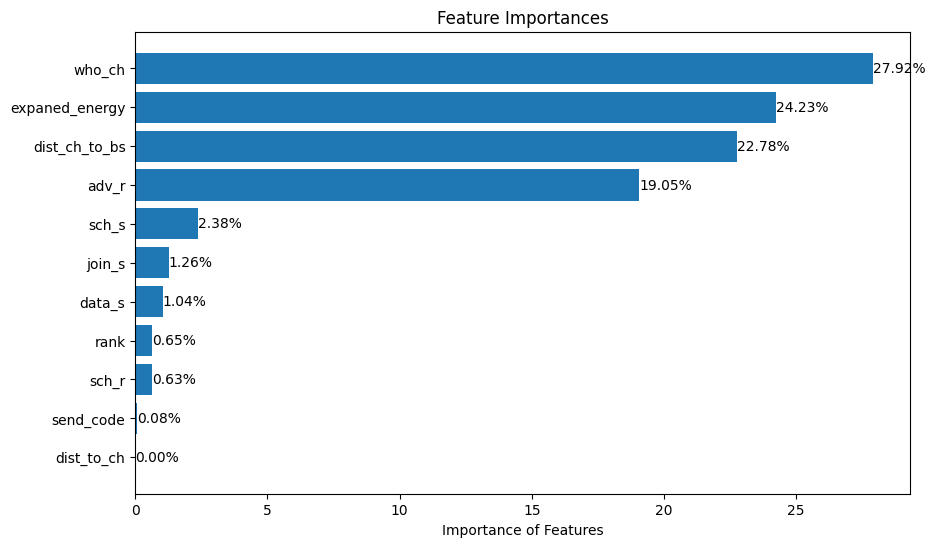






>> ROS

[LGBMClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.57 +- 0.17', 'Recall': '98.6 +- 0.17', 'F1': '98.58 +- 0.15', 'ROC_AUC': '99.95 +- 0.01', 'Log_Loss': '0.0383 +- 0.0031'}

Model Test: {'Precision': "87.05, {'0': 100.0, '1': 66.71, '2': 99.5, '3': 81.99}", 'Recall': "98.34, {'0': 97.71, '1': 99.76, '2': 98.91, '3': 96.98}", 'F1': "91.71, {'0': 98.84, '1': 79.96, '2': 99.2, '3': 88.86}", 'ROC_AUC': '99.94', 'Log_Loss': '0.1098'}



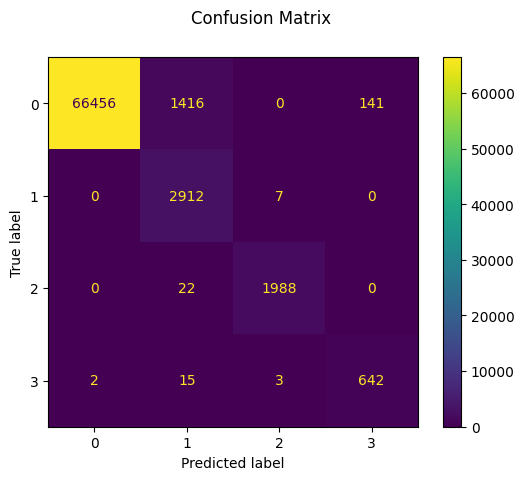

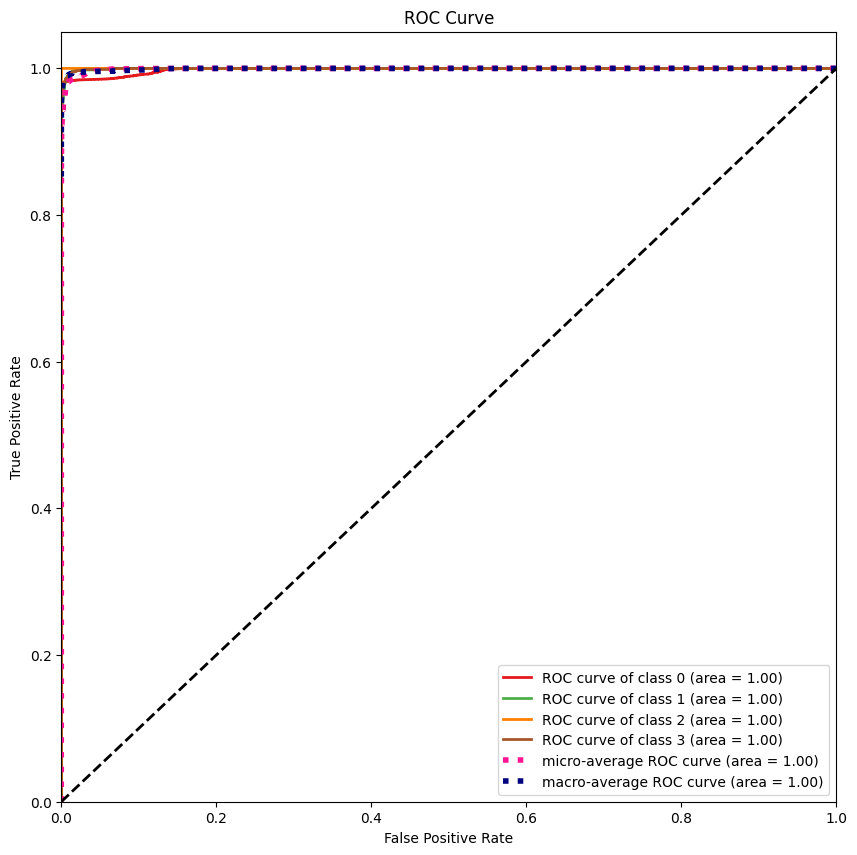

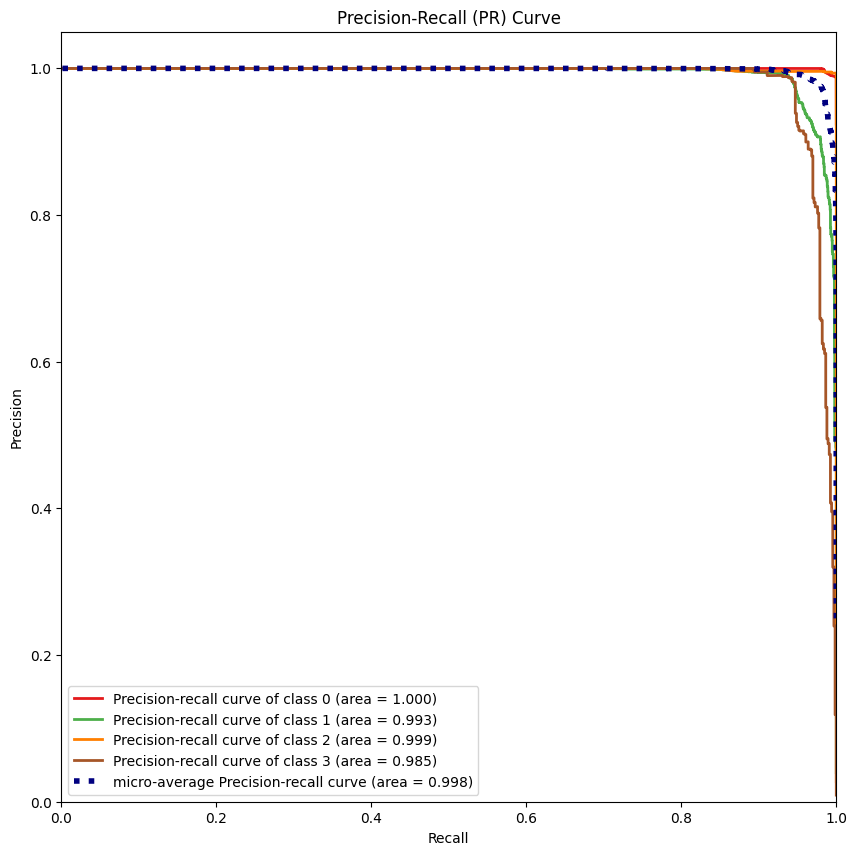

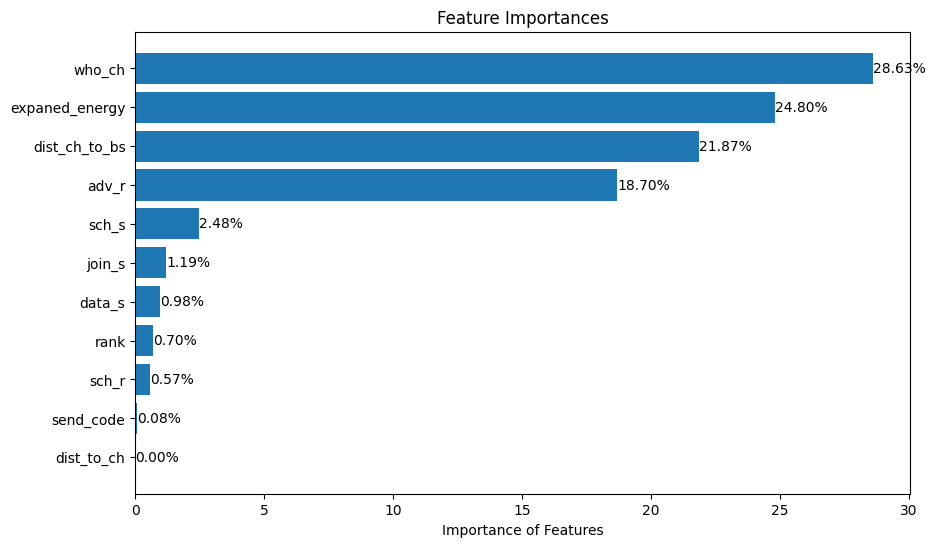






>> SMOTENC

[LGBMClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.14 +- 0.11', 'Recall': '98.12 +- 0.2', 'F1': '98.13 +- 0.12', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0468 +- 0.0037'}

Model Test: {'Precision': "84.82, {'0': 100.0, '1': 63.72, '2': 98.81, '3': 76.73}", 'Recall': "98.28, {'0': 97.33, '1': 99.28, '2': 99.4, '3': 97.13}", 'F1': "90.28, {'0': 98.64, '1': 77.62, '2': 99.11, '3': 85.73}", 'ROC_AUC': '99.89', 'Log_Loss': '0.1259'}



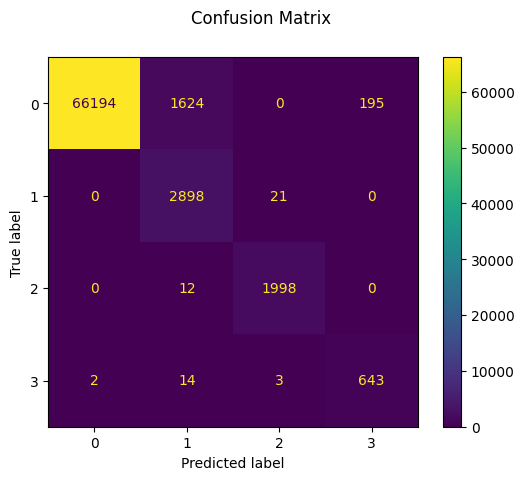

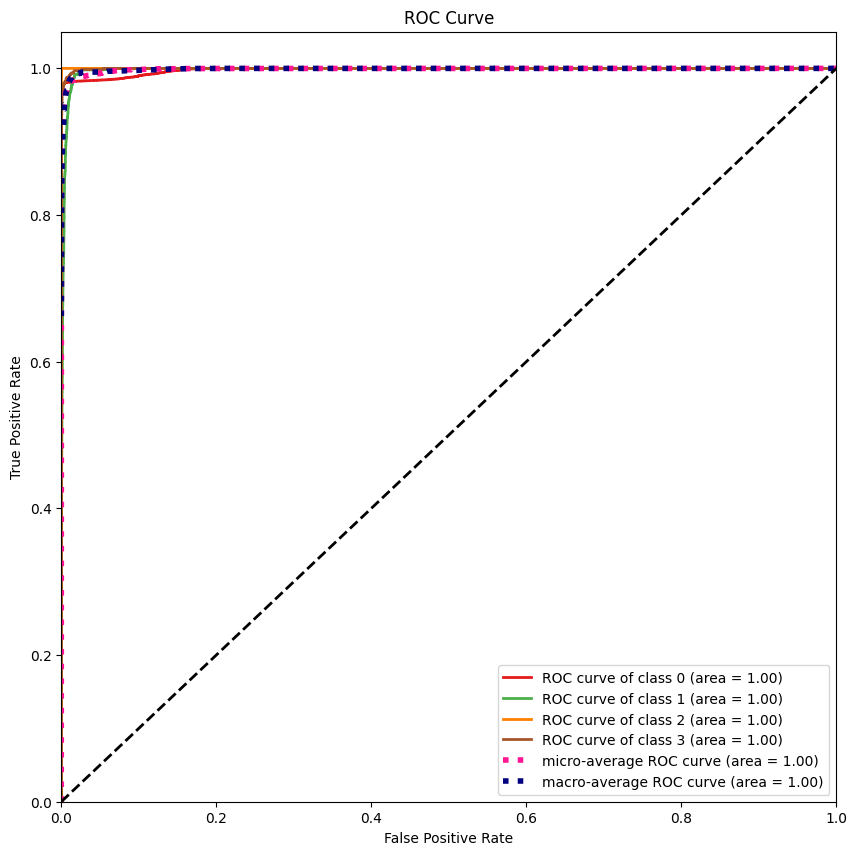

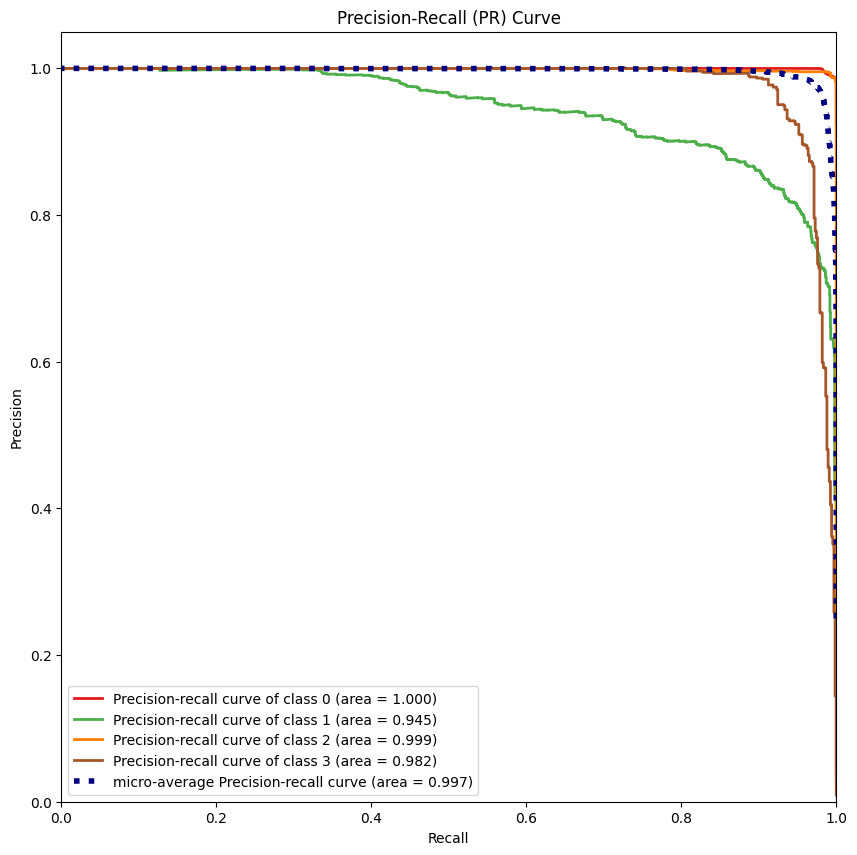

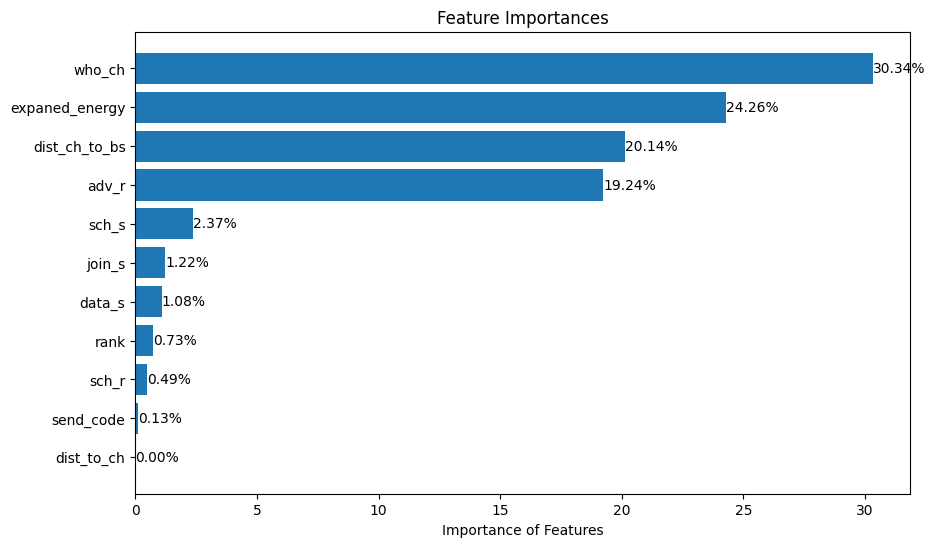






>> CTGAN

[LGBMClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.0 +- 0.13', 'Recall': '98.01 +- 0.2', 'F1': '98.0 +- 0.13', 'ROC_AUC': '99.94 +- 0.01', 'Log_Loss': '0.043 +- 0.0027'}

Model Test: {'Precision': "86.24, {'0': 100.0, '1': 67.28, '2': 99.4, '3': 78.27}", 'Recall': "98.3, {'0': 97.71, '1': 99.69, '2': 98.96, '3': 96.83}", 'F1': "91.23, {'0': 98.84, '1': 80.34, '2': 99.18, '3': 86.56}", 'ROC_AUC': '99.94', 'Log_Loss': '0.1011'}



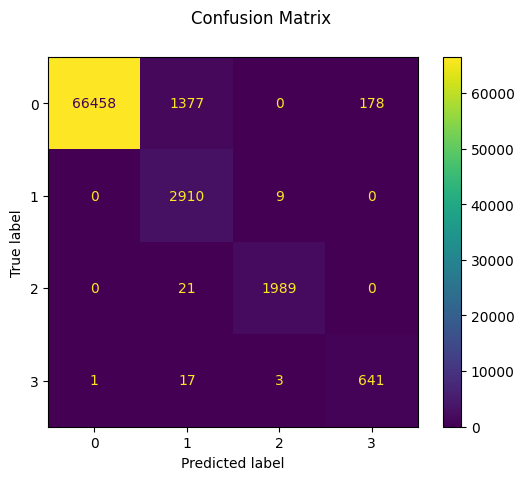

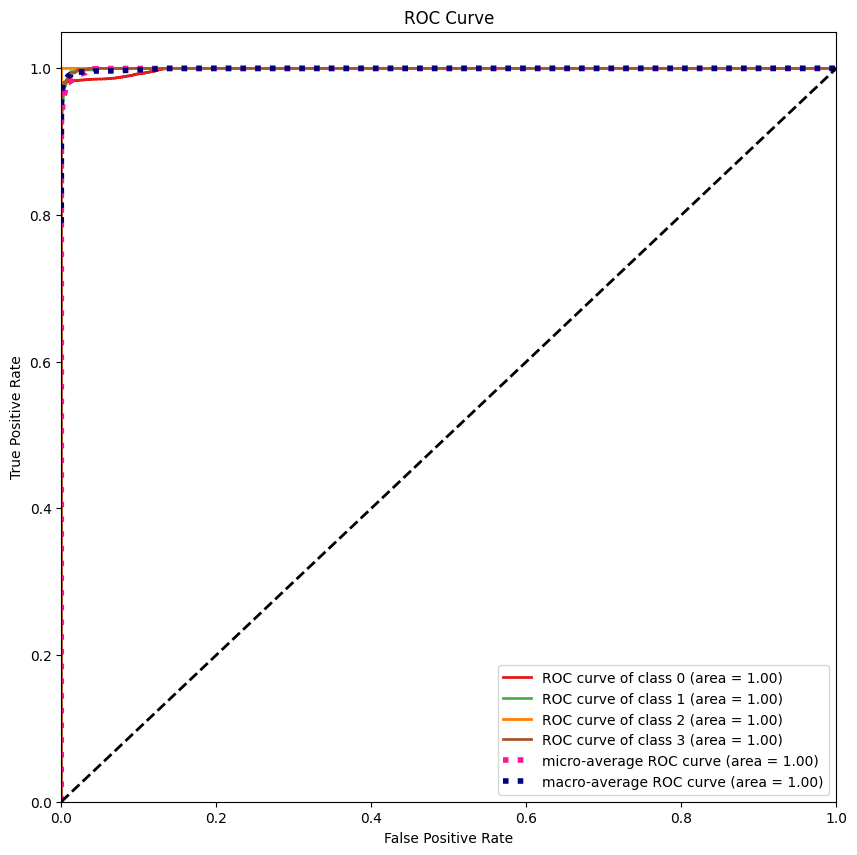

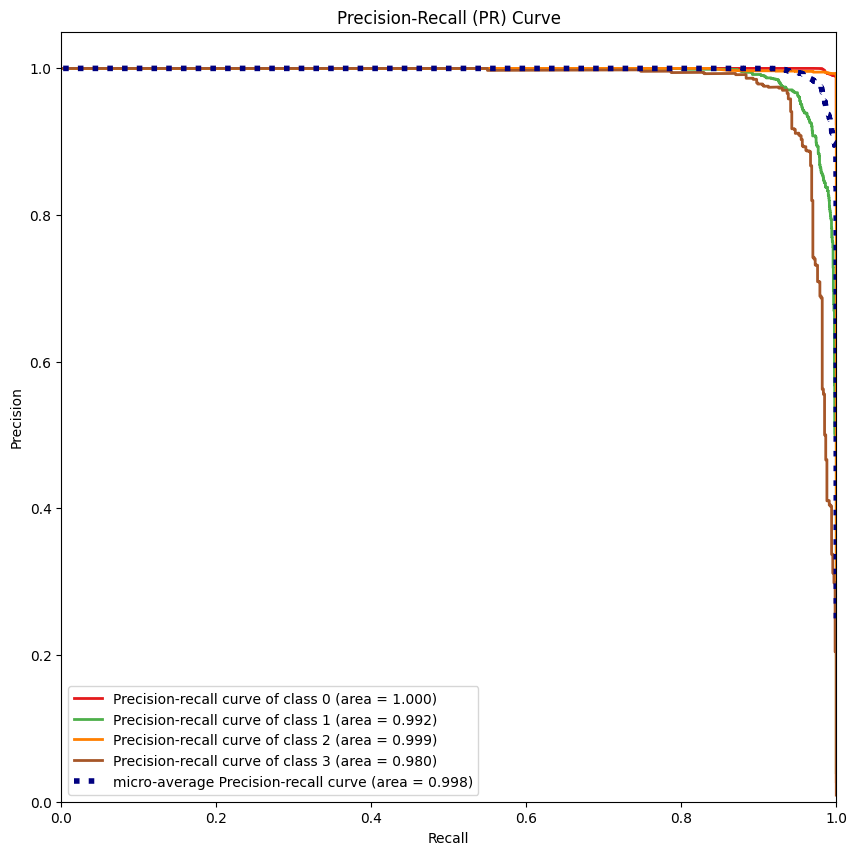

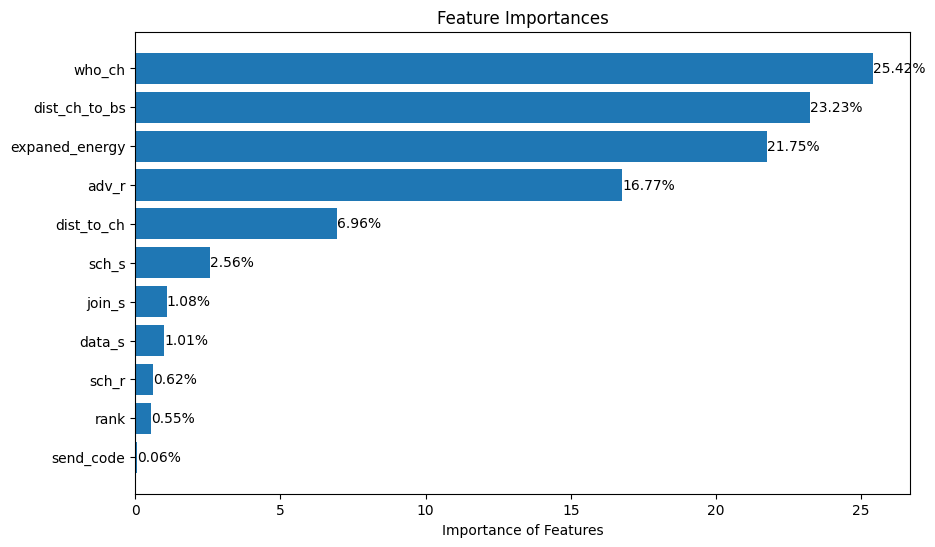

In [6]:
for strategy in ["ONLY_RUS", "ROS", "SMOTENC", "CTGAN"]:  # For each resampling strategy...
    print(f"\n>> {strategy}\n")
    # Split into X and y
    X_train, y_train = split_X_y(resampled[strategy]["data"], "is_target", [])
    
    # Optimizing hyperparameters...
    model, best_hyperparams, _ = HyperParamLightGBMClassifier(
        X_train, y_train, n_trials=10).run()

    # Cross-Validation with k = 5
    resampled[strategy]["lgb"]["train_metrics"] = train_validate_model(model, X_train, y_train)
    # Training model...
    model = LGBMClassifier(**best_hyperparams, verbosity=-1)
    model.fit(X_train, y_train)
    # Model testing
    resampled[strategy]["lgb"]["test_metrics"] = test_model(model, X_test, y_test)
    print("\n")
    # ROC and PR Curves
    plot_roc_curve(model, X_test, y_test)
    print("\n")
    plot_pr_curve(model, X_test, y_test)
    # Save trained model
    resampled[strategy]["lgb"]["obj"] = model
    save_object(resampled[strategy]["lgb"]["obj"], f"{BIN_PATH}lgb_{strategy}_obj")
    print("\n")

    # Feature Importance
    plot_feature_importances(resampled[strategy]["lgb"]["obj"], features, top_n=len(features))
    # Weights
    plot_weights(resampled[strategy]["lgb"]["obj"], features, top_n=len(features))
    print("\n\n\n")

### 03.3. XGBoost


>> ONLY_RUS

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.65 +- 0.25', 'Recall': '97.73 +- 0.23', 'F1': '97.69 +- 0.23', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0482 +- 0.0039'}

Model Test: {'Precision': "88.16, {'0': 99.99, '1': 67.03, '2': 99.5, '3': 86.12}", 'Recall': "98.22, {'0': 97.8, '1': 99.76, '2': 98.81, '3': 96.53}", 'F1': "92.31, {'0': 98.88, '1': 80.19, '2': 99.15, '3': 91.03}", 'ROC_AUC': '99.94', 'Log_Loss': '0.1068'}



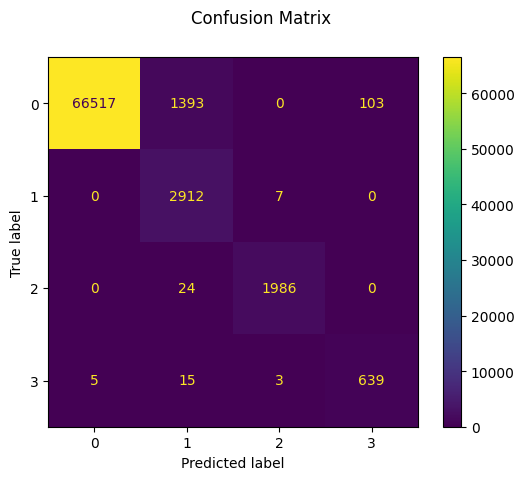

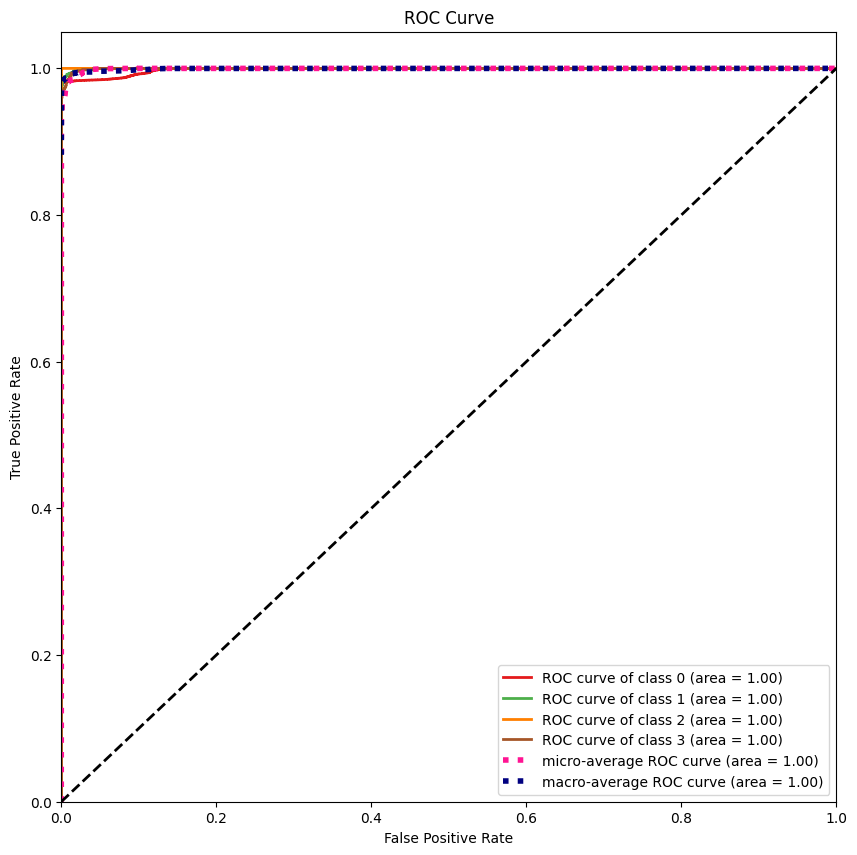

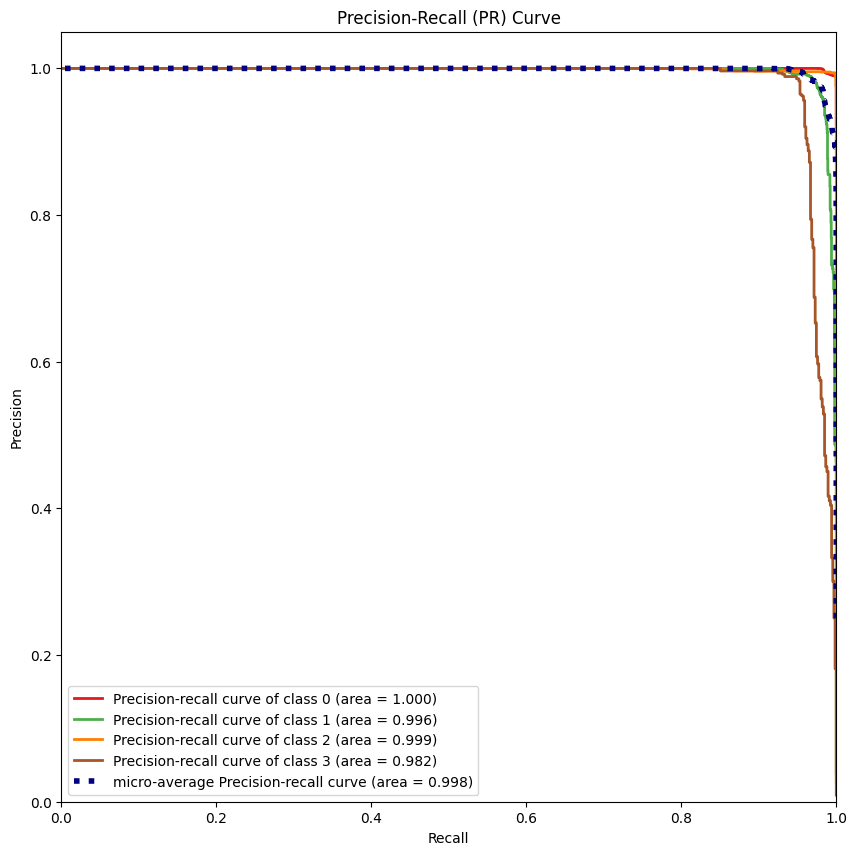

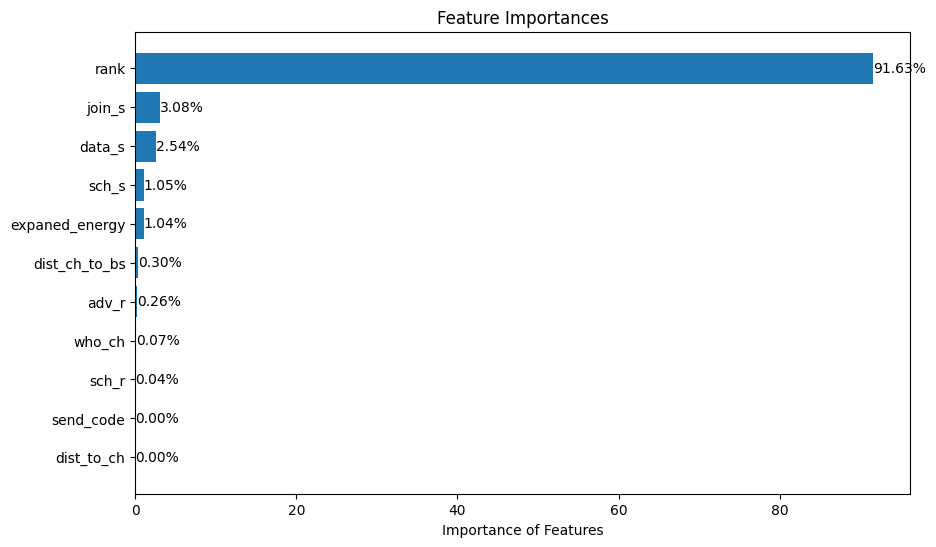






>> ROS

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.53 +- 0.15', 'Recall': '98.56 +- 0.22', 'F1': '98.54 +- 0.18', 'ROC_AUC': '99.95 +- 0.01', 'Log_Loss': '0.0391 +- 0.0044'}

Model Test: {'Precision': "84.96, {'0': 99.99, '1': 66.77, '2': 99.5, '3': 73.59}", 'Recall': "98.05, {'0': 97.6, '1': 99.76, '2': 98.46, '3': 96.37}", 'F1': "90.3, {'0': 98.78, '1': 80.0, '2': 98.97, '3': 83.45}", 'ROC_AUC': '99.94', 'Log_Loss': '0.1141'}



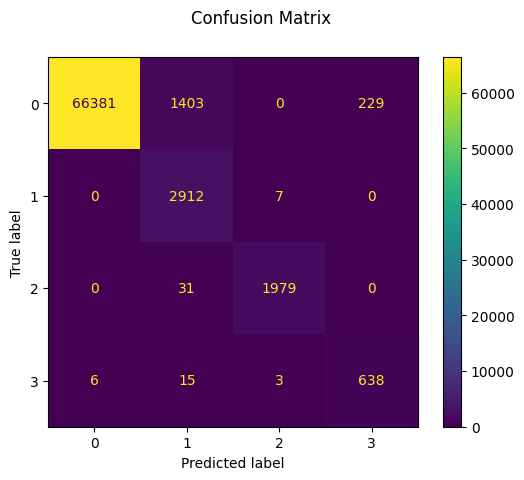

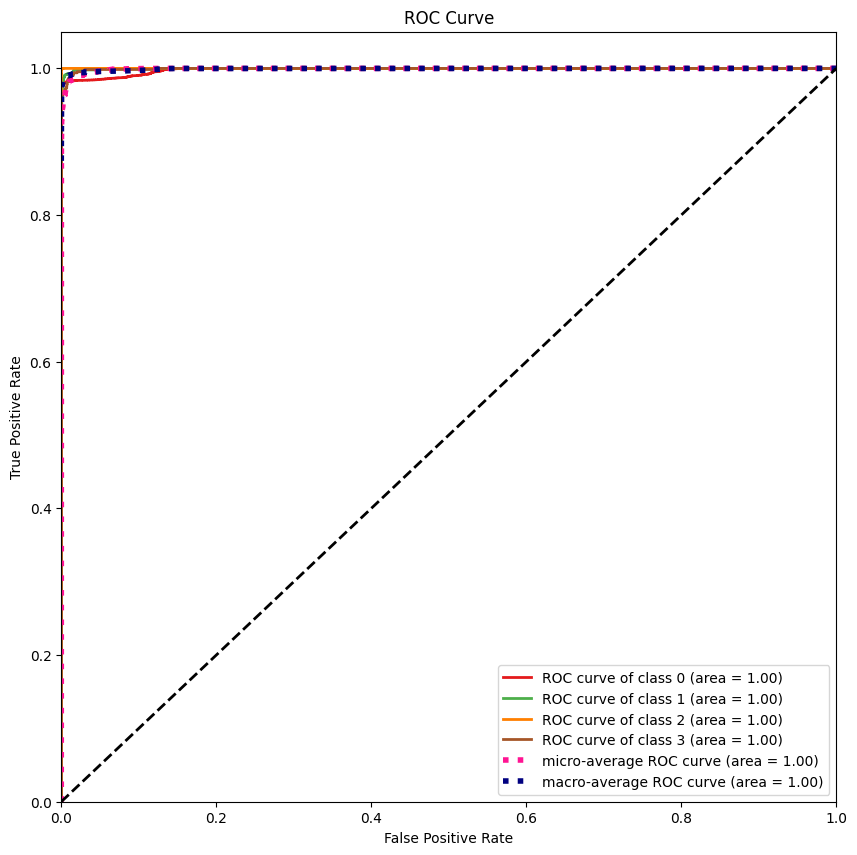

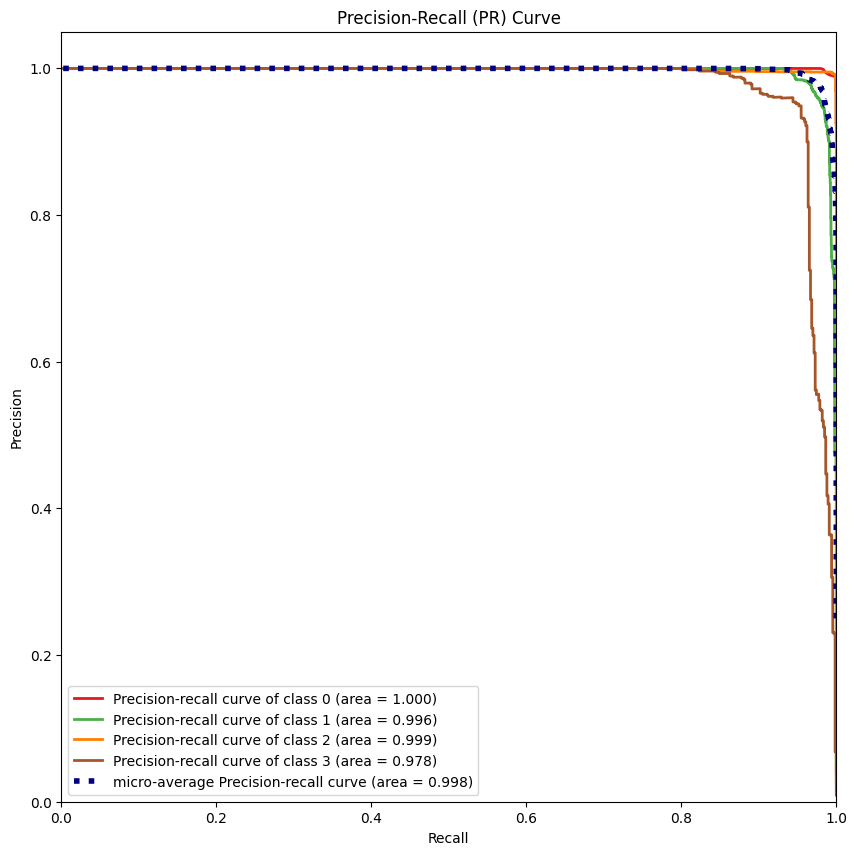

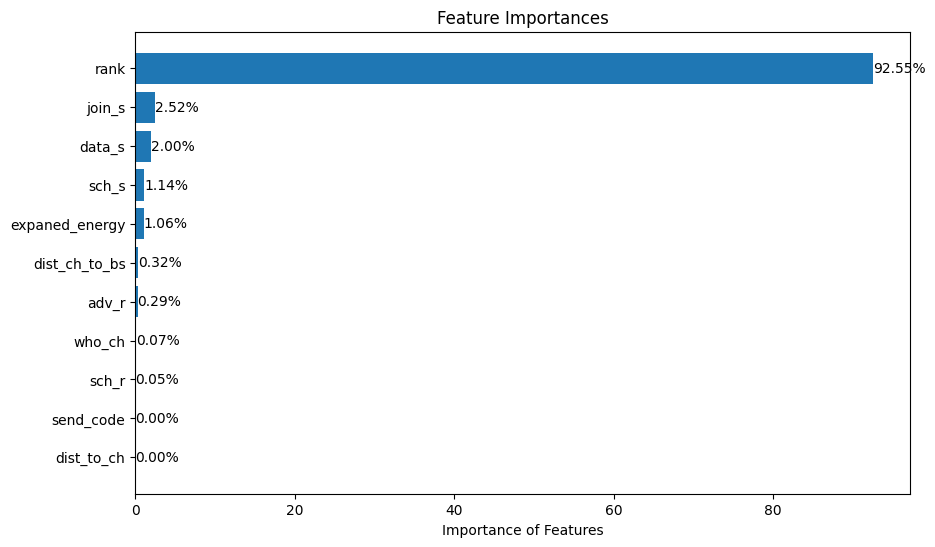






>> SMOTENC

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.06 +- 0.19', 'Recall': '97.97 +- 0.18', 'F1': '98.01 +- 0.14', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0494 +- 0.0031'}

Model Test: {'Precision': "83.75, {'0': 100.0, '1': 65.15, '2': 98.76, '3': 71.08}", 'Recall': "98.31, {'0': 97.38, '1': 99.25, '2': 99.35, '3': 97.28}", 'F1': "89.63, {'0': 98.67, '1': 78.66, '2': 99.06, '3': 82.14}", 'ROC_AUC': '99.87', 'Log_Loss': '0.1342'}



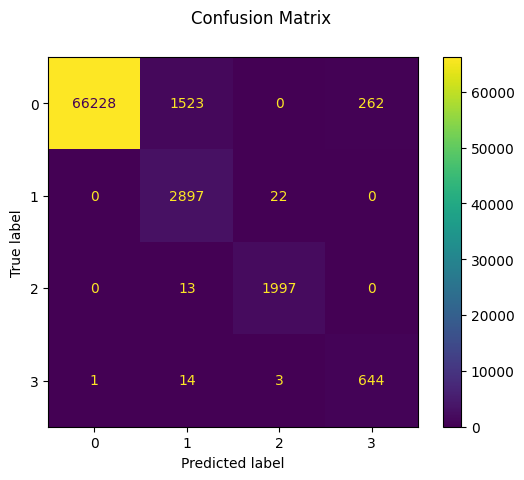

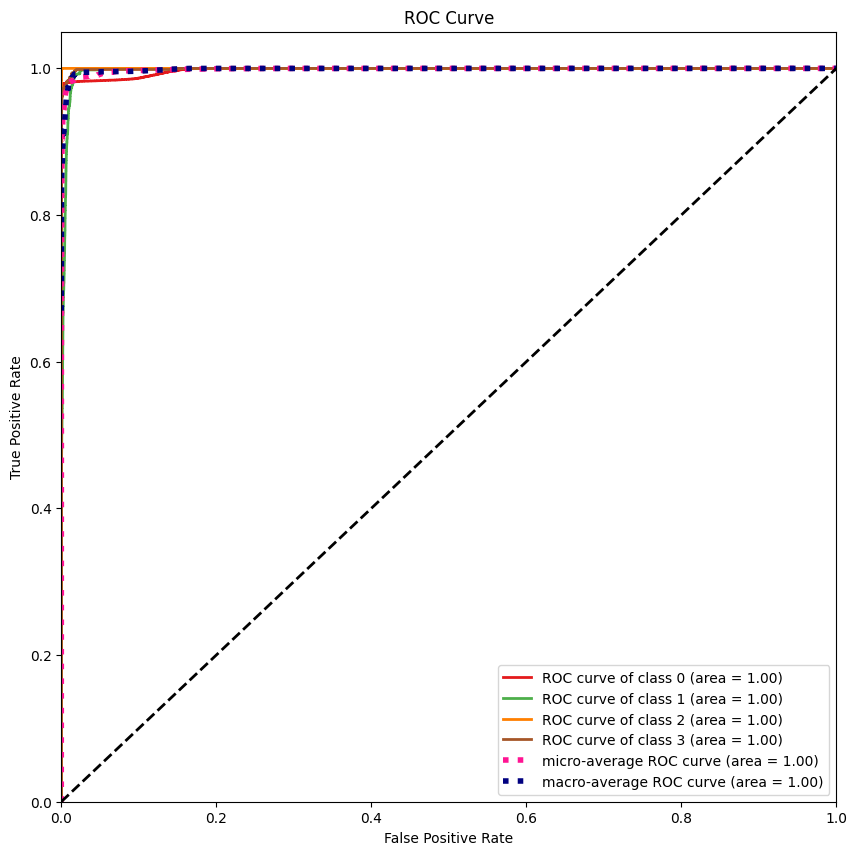

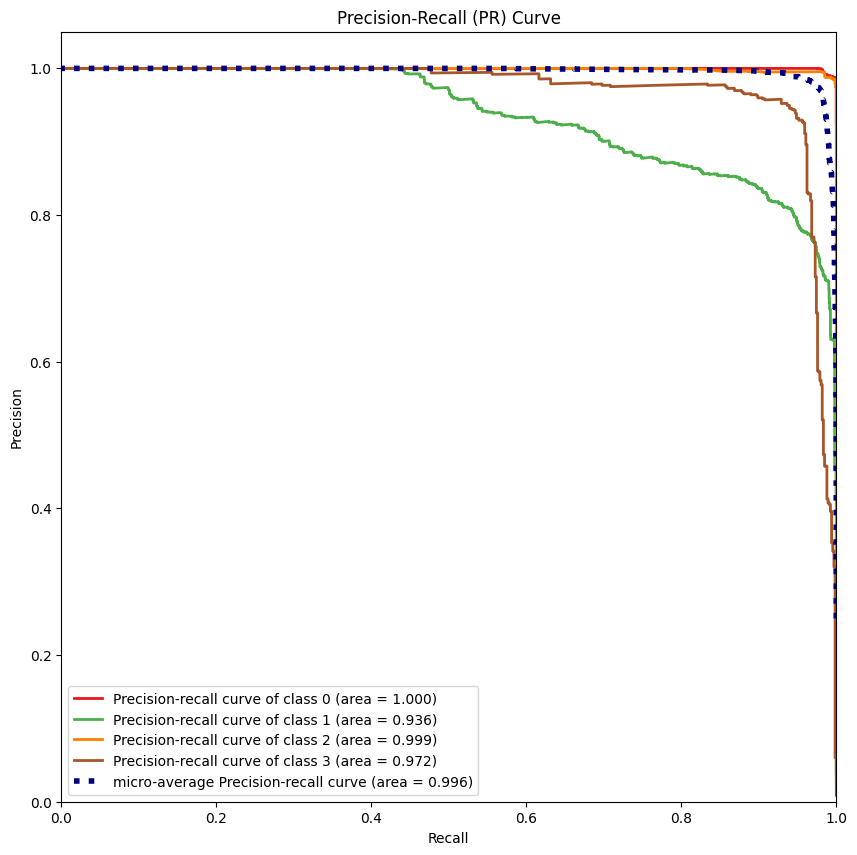

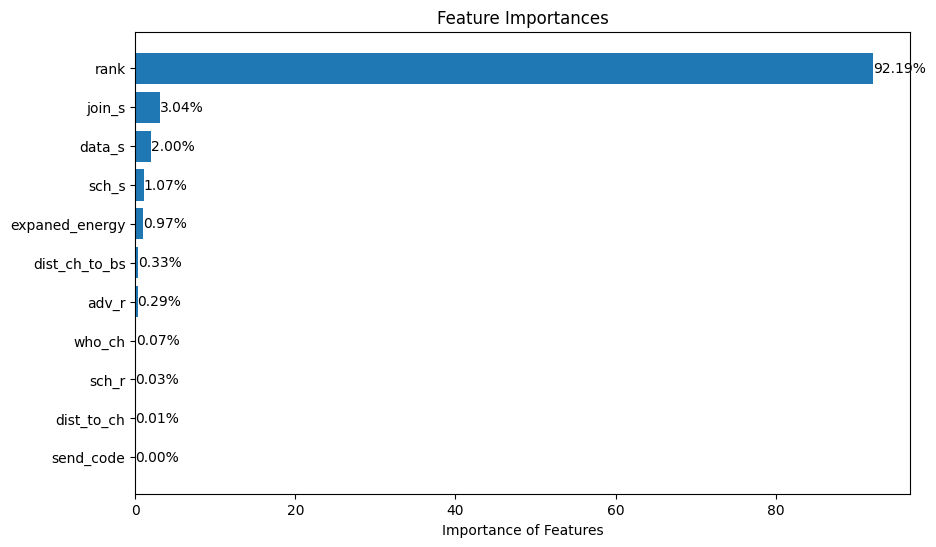






>> CTGAN

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.93 +- 0.14', 'Recall': '97.74 +- 0.21', 'F1': '97.83 +- 0.16', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0471 +- 0.0036'}

Model Test: {'Precision': "87.15, {'0': 99.99, '1': 67.5, '2': 99.45, '3': 81.67}", 'Recall': "98.16, {'0': 97.79, '1': 99.76, '2': 98.86, '3': 96.22}", 'F1': "91.72, {'0': 98.88, '1': 80.52, '2': 99.15, '3': 88.35}", 'ROC_AUC': '99.94', 'Log_Loss': '0.103'}



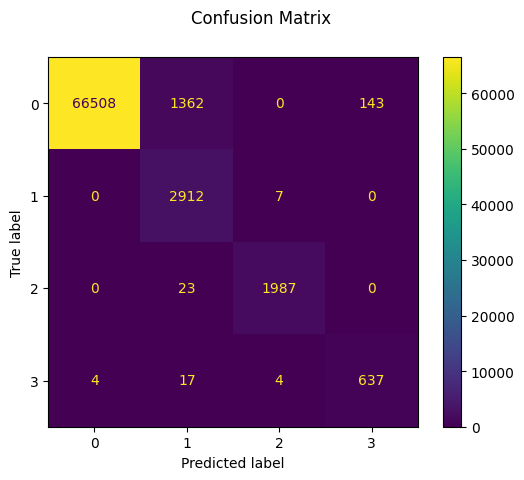

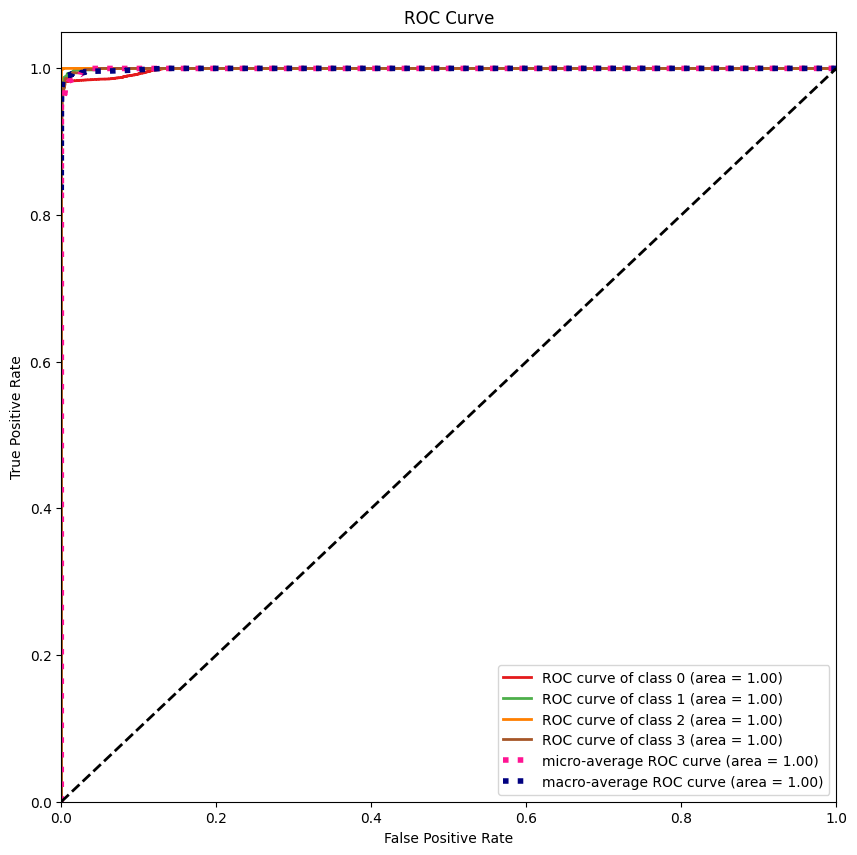

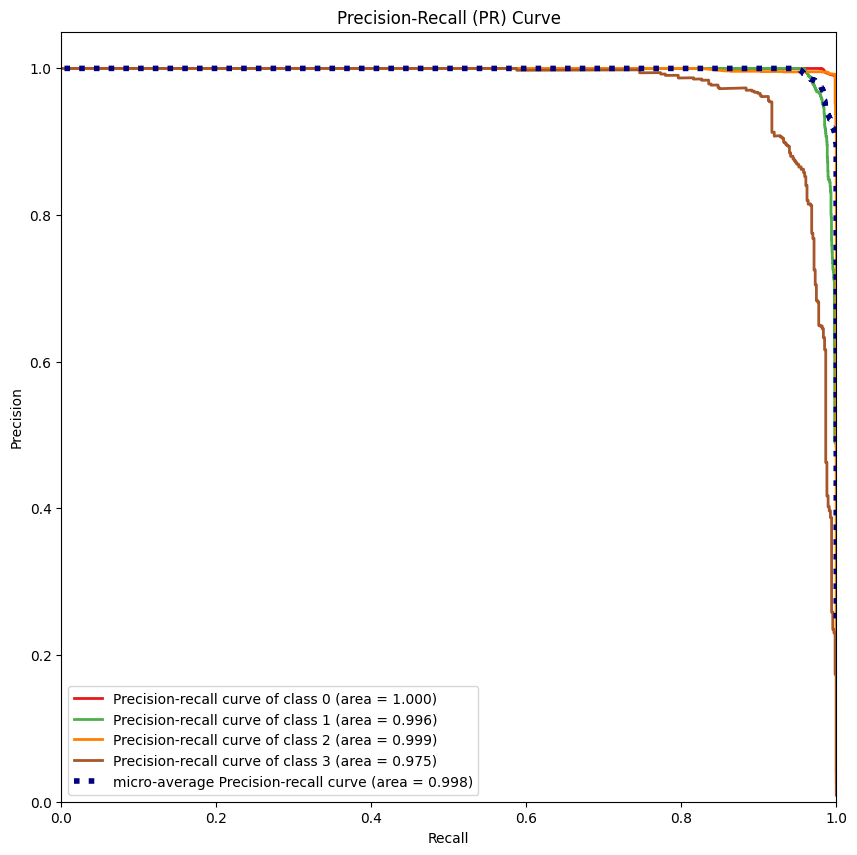

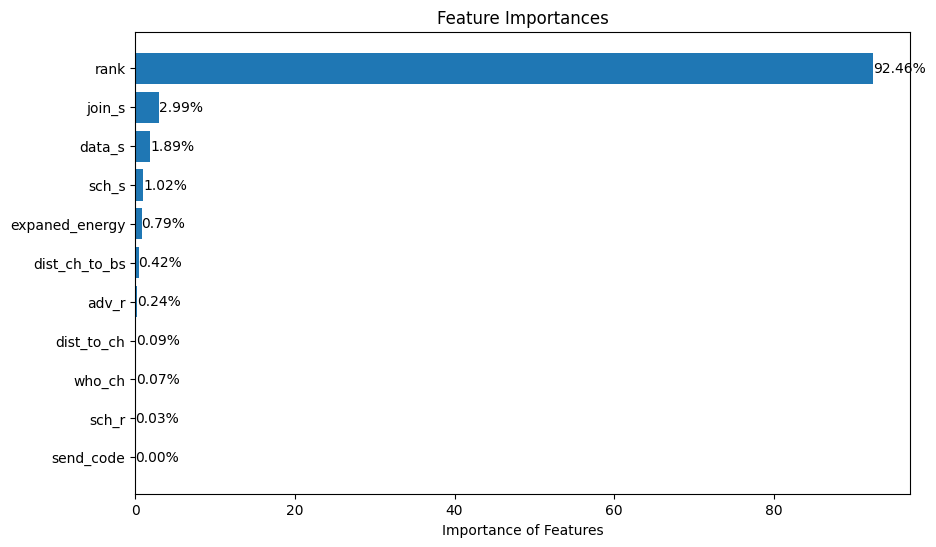

In [7]:
for strategy in ["ONLY_RUS", "ROS", "SMOTENC", "CTGAN"]:  # For each resampling strategy...
    print(f"\n>> {strategy}\n")
    # Split into X and y
    X_train, y_train = split_X_y(resampled[strategy]["data"], "is_target", [])
    
    # Optimizing hyperparameters...
    model, best_hyperparams, _ = HyperParamXGBoostClassifier(
        X_train, y_train, n_trials=10).run()

    # Cross-Validation with k = 5
    resampled[strategy]["xgb"]["train_metrics"] = train_validate_model(model, X_train, y_train)
    # Training model...
    model = XGBClassifier(**best_hyperparams)
    model.fit(X_train, y_train)
    # Model testing
    resampled[strategy]["xgb"]["test_metrics"] = test_model(model, X_test, y_test)
    print("\n")
    # ROC and PR Curves
    plot_roc_curve(model, X_test, y_test)
    print("\n")
    plot_pr_curve(model, X_test, y_test)
    # Save trained model
    resampled[strategy]["xgb"]["obj"] = model
    save_object(resampled[strategy]["xgb"]["obj"], f"{BIN_PATH}xgb_{strategy}_obj")
    print("\n")

    # Feature Importance
    plot_feature_importances(resampled[strategy]["xgb"]["obj"], features, top_n=len(features))
    # Weights
    plot_weights(resampled[strategy]["xgb"]["obj"], features, top_n=len(features))
    print("\n\n\n")

### 03.4. Random Forest


>> ONLY_RUS

[RandomForestClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.5 +- 0.2', 'Recall': '97.09 +- 0.18', 'F1': '97.29 +- 0.16', 'ROC_AUC': '99.87 +- 0.04', 'Log_Loss': '0.0706 +- 0.0115'}

Model Test: {'Precision': "84.22, {'0': 99.99, '1': 69.7, '2': 95.14, '3': 72.06}", 'Recall': "98.22, {'0': 97.69, '1': 99.69, '2': 99.25, '3': 96.22}", 'F1': "90.11, {'0': 98.83, '1': 82.04, '2': 97.15, '3': 82.41}", 'ROC_AUC': '99.6', 'Log_Loss': '0.4912'}



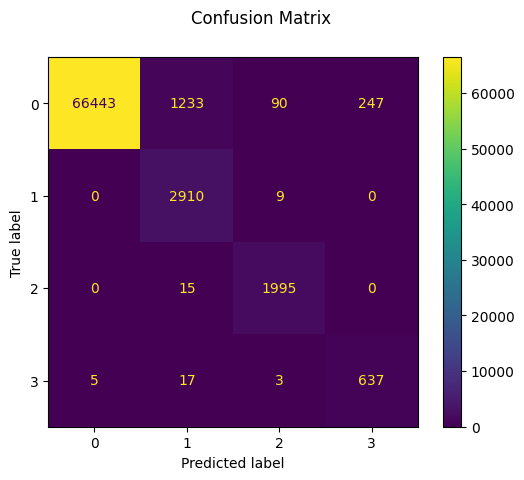

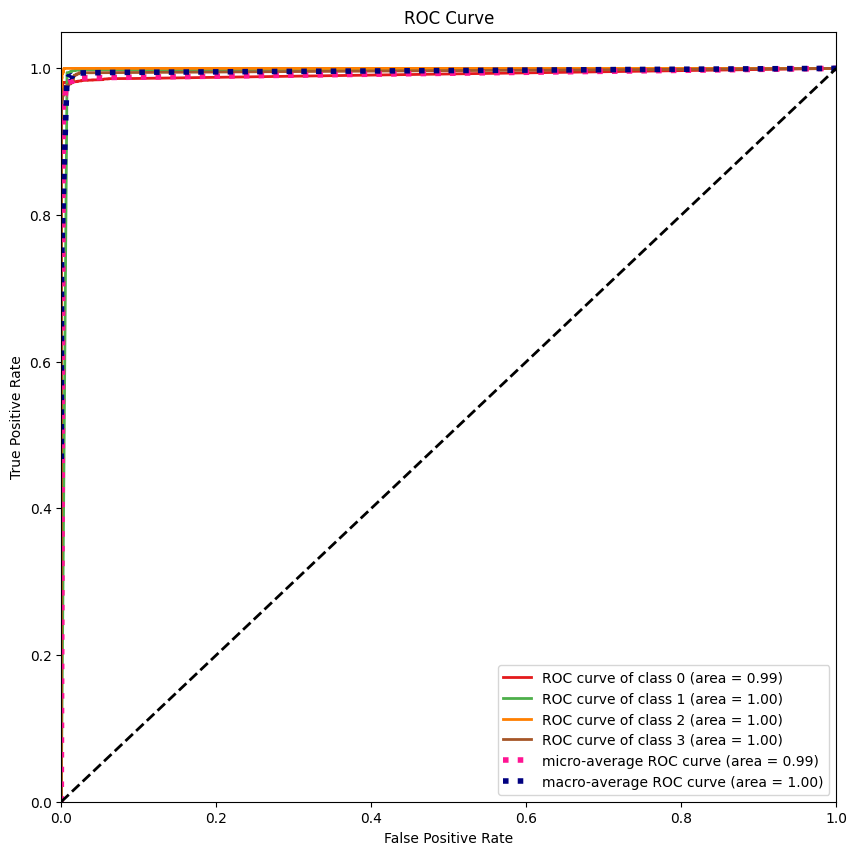

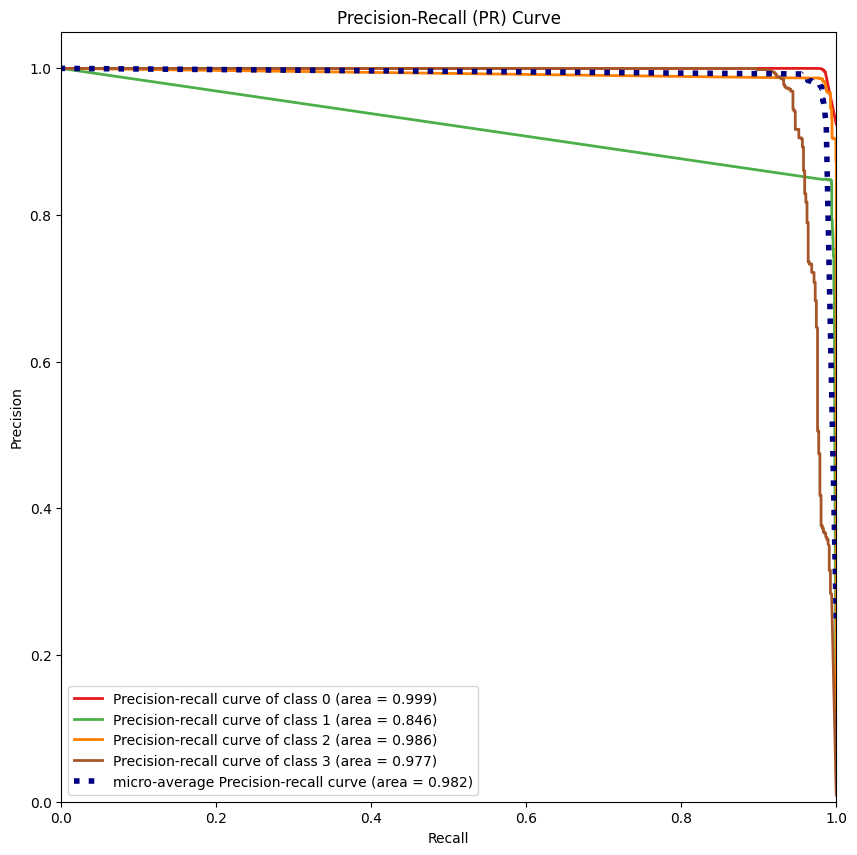

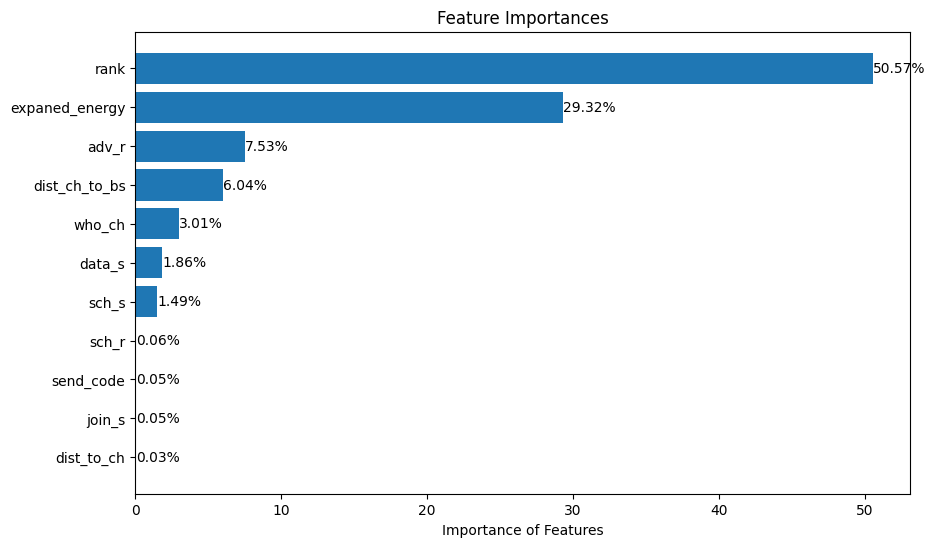






>> ROS

[RandomForestClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.29 +- 0.14', 'Recall': '98.09 +- 0.26', 'F1': '98.18 +- 0.18', 'ROC_AUC': '99.91 +- 0.02', 'Log_Loss': '0.0586 +- 0.0094'}

Model Test: {'Precision': "83.36, {'0': 100.0, '1': 67.76, '2': 94.95, '3': 70.75}", 'Recall': "98.31, {'0': 97.48, '1': 99.73, '2': 99.2, '3': 96.83}", 'F1': "89.55, {'0': 98.72, '1': 80.69, '2': 97.03, '3': 81.76}", 'ROC_AUC': '99.58', 'Log_Loss': '0.5211'}



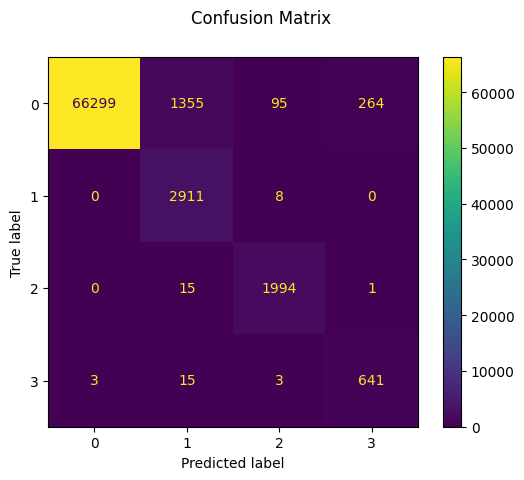

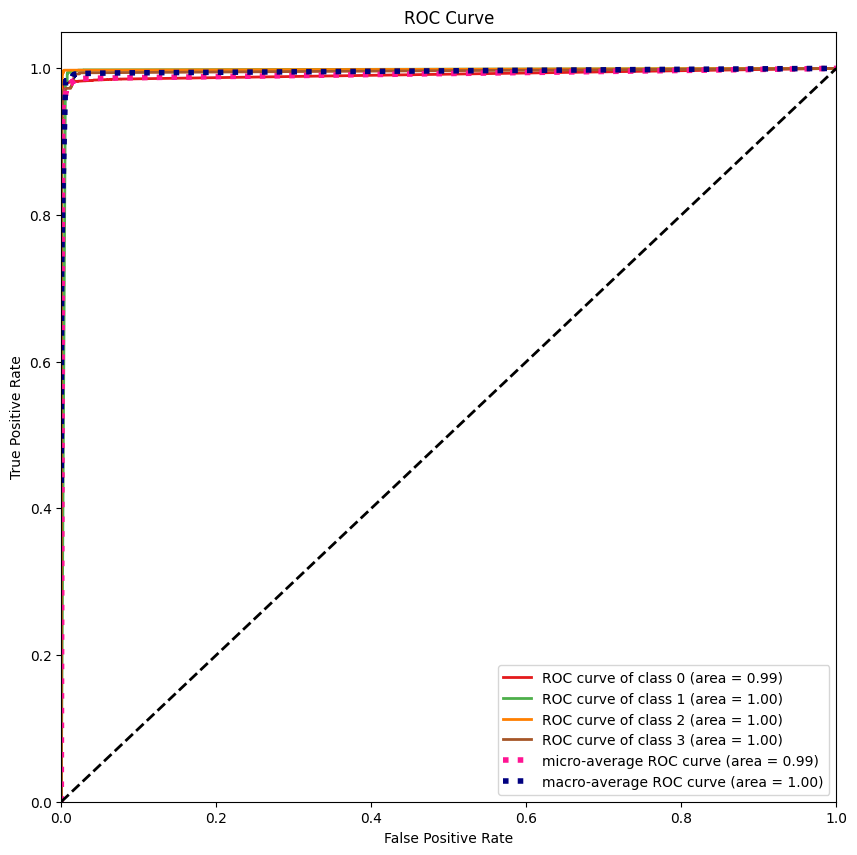

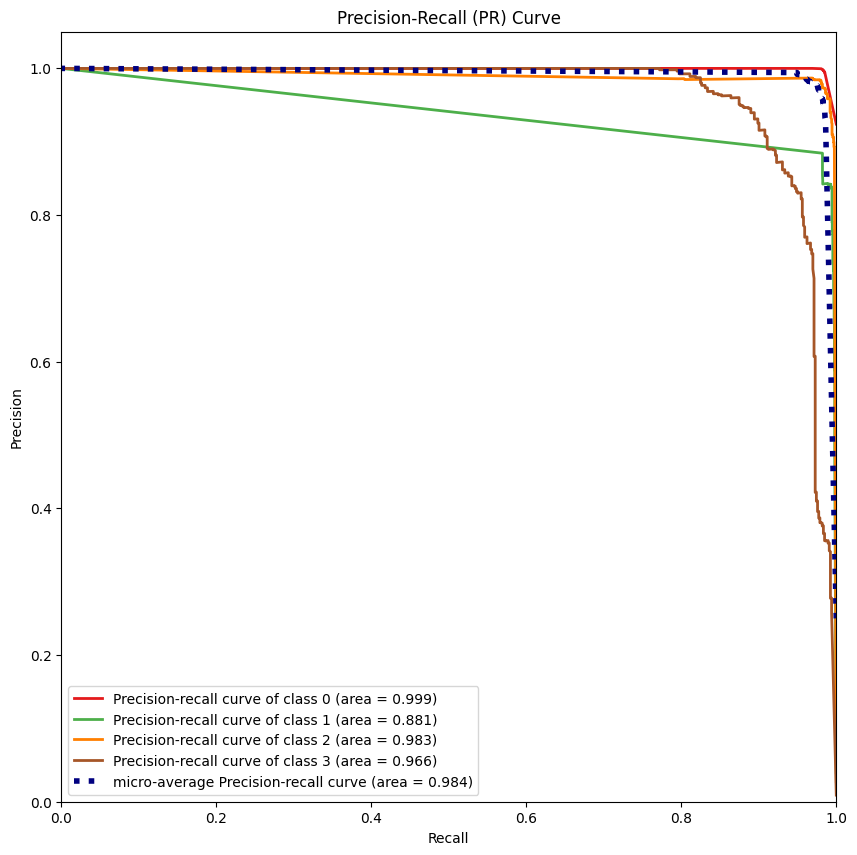

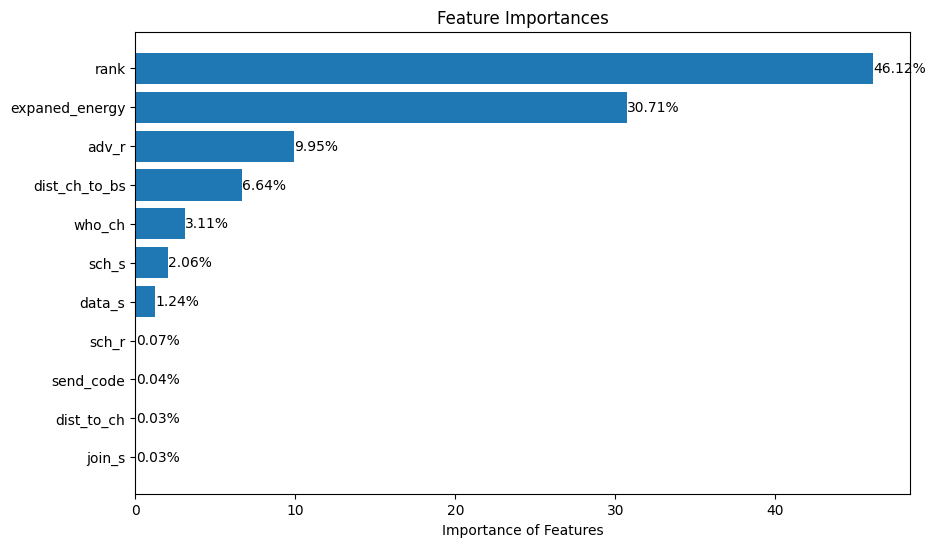






>> SMOTENC

[RandomForestClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.93 +- 0.11', 'Recall': '97.64 +- 0.2', 'F1': '97.78 +- 0.08', 'ROC_AUC': '99.88 +- 0.02', 'Log_Loss': '0.0725 +- 0.0083'}

Model Test: {'Precision': "79.06, {'0': 100.0, '1': 64.8, '2': 93.47, '3': 57.98}", 'Recall': "98.18, {'0': 96.86, '1': 99.73, '2': 99.0, '3': 97.13}", 'F1': "86.43, {'0': 98.4, '1': 78.56, '2': 96.16, '3': 72.61}", 'ROC_AUC': '99.53', 'Log_Loss': '0.5274'}



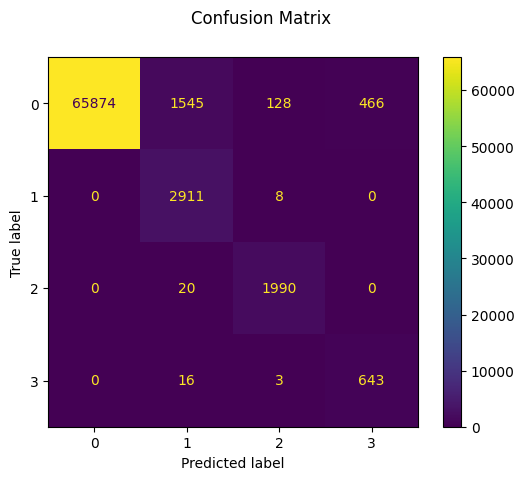

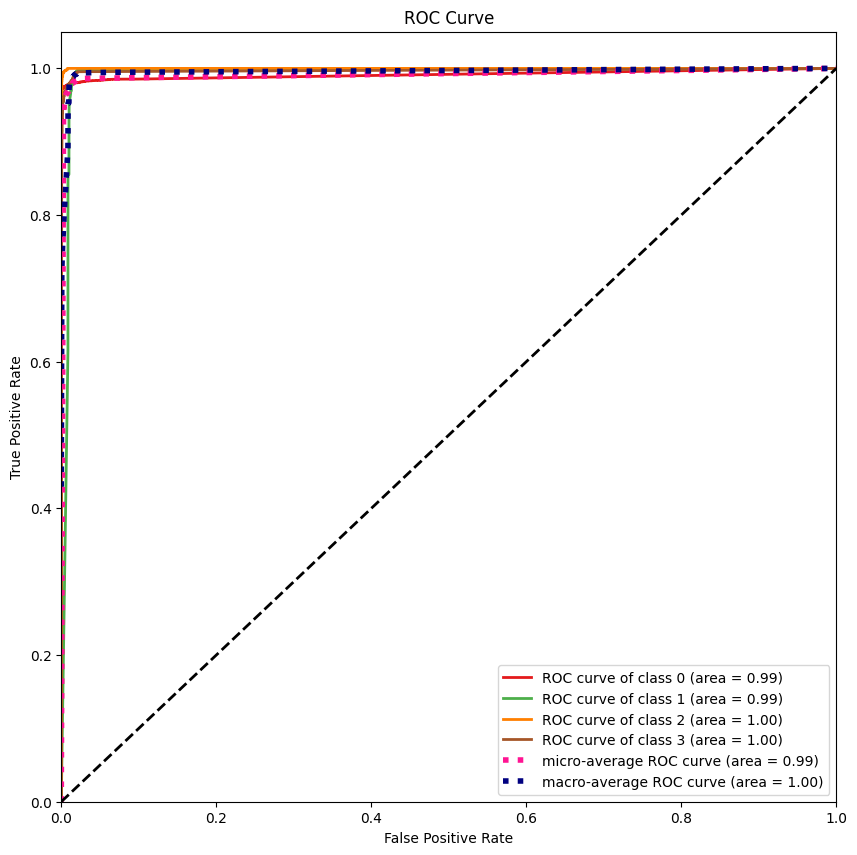

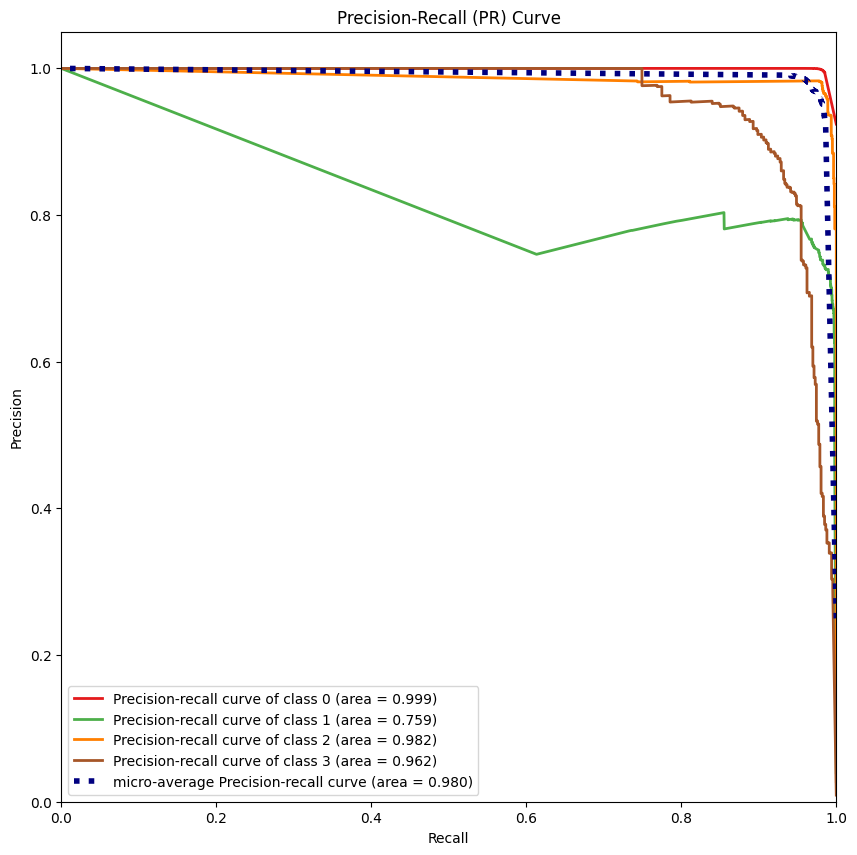

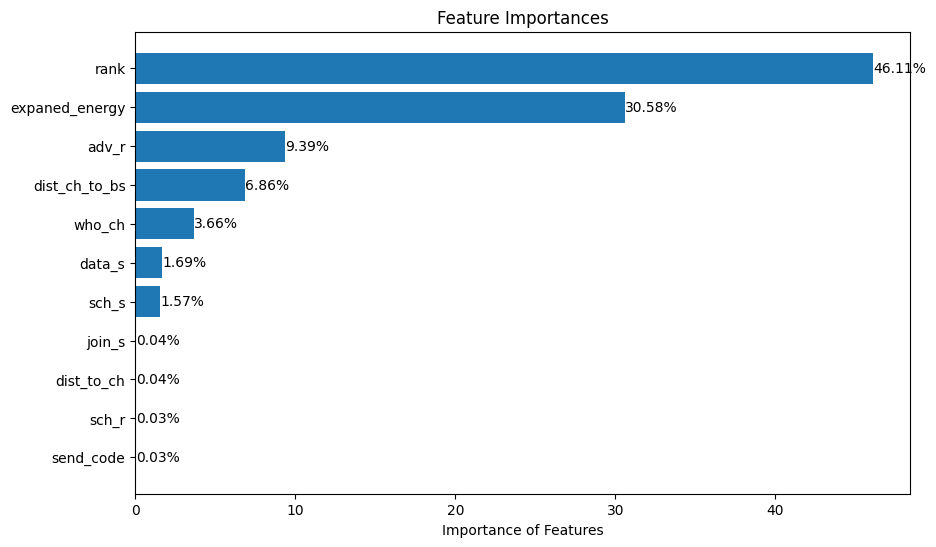






>> CTGAN

[RandomForestClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.46 +- 0.15', 'Recall': '97.13 +- 0.3', 'F1': '97.29 +- 0.19', 'ROC_AUC': '99.87 +- 0.02', 'Log_Loss': '0.0697 +- 0.0071'}

Model Test: {'Precision': "82.7, {'0': 99.99, '1': 67.19, '2': 94.52, '3': 69.09}", 'Recall': "97.9, {'0': 97.39, '1': 99.76, '2': 99.6, '3': 94.86}", 'F1': "88.98, {'0': 98.68, '1': 80.3, '2': 97.0, '3': 79.95}", 'ROC_AUC': '99.7', 'Log_Loss': '0.487'}



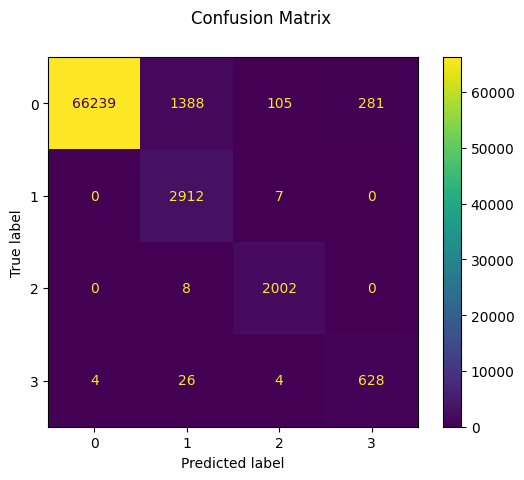

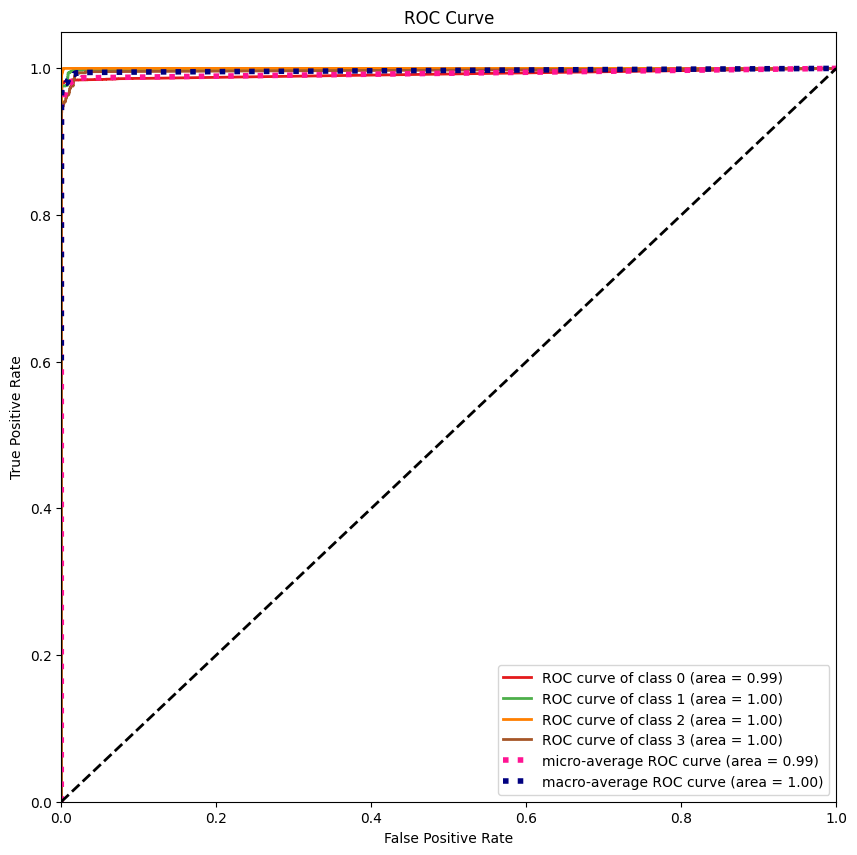

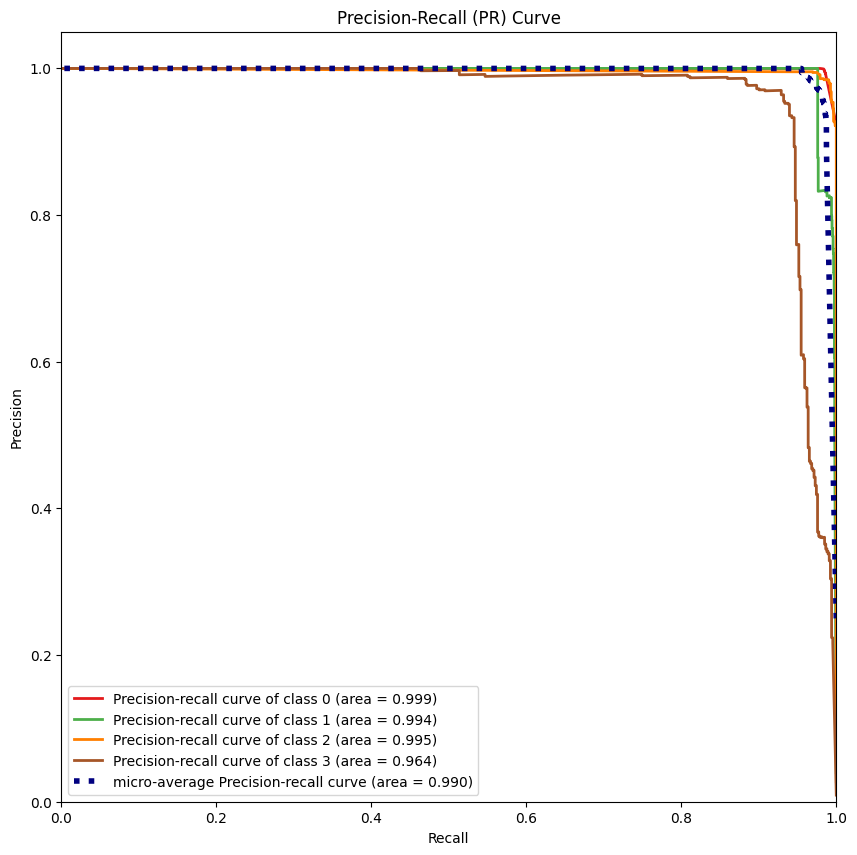

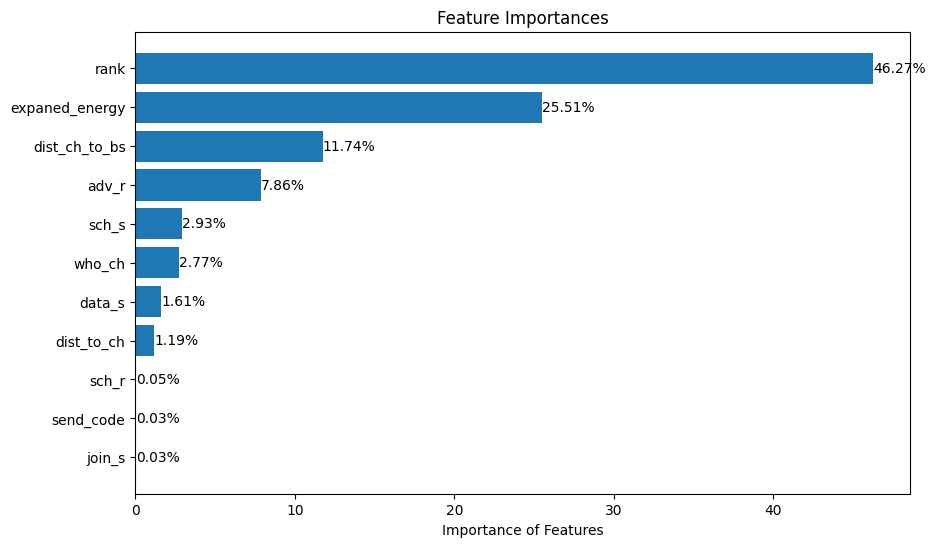

In [8]:
for strategy in ["ONLY_RUS", "ROS", "SMOTENC", "CTGAN"]:  # For each resampling strategy...
    print(f"\n>> {strategy}\n")
    # Split into X and y
    X_train, y_train = split_X_y(resampled[strategy]["data"], "is_target", [])
    
    # Optimizing hyperparameters...
    model, best_hyperparams, _ = HyperParamRandomForestClassifier(
        X_train, y_train, n_trials=10).run()

    # Cross-Validation with k = 5
    resampled[strategy]["rf"]["train_metrics"] = train_validate_model(model, X_train, y_train)
    # Training model...
    model = RandomForestClassifier(**best_hyperparams)
    model.fit(X_train, y_train)
    # Model testing
    resampled[strategy]["rf"]["test_metrics"] = test_model(model, X_test, y_test)
    print("\n")
    # ROC and PR Curves
    plot_roc_curve(model, X_test, y_test)
    print("\n")
    plot_pr_curve(model, X_test, y_test)
    # Save trained model
    resampled[strategy]["rf"]["obj"] = model
    save_object(resampled[strategy]["rf"]["obj"], f"{BIN_PATH}rf_{strategy}_obj")
    print("\n")

    # Feature Importance
    plot_feature_importances(resampled[strategy]["rf"]["obj"], features, top_n=len(features))
    # Weights
    plot_weights(resampled[strategy]["rf"]["obj"], features, top_n=len(features))
    print("\n\n\n")

### 03.5. XGBoost-Boruta


>> ONLY_RUS

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.34 +- 0.22', 'Recall': '97.5 +- 0.19', 'F1': '97.42 +- 0.18', 'ROC_AUC': '99.92 +- 0.01', 'Log_Loss': '0.0521 +- 0.0038'}

Model Test: {'Precision': "86.33, {'0': 100.0, '1': 65.23, '2': 99.55, '3': 80.56}", 'Recall': "97.98, {'0': 97.57, '1': 99.73, '2': 98.26, '3': 96.37}", 'F1': "91.07, {'0': 98.77, '1': 78.87, '2': 98.9, '3': 87.76}", 'ROC_AUC': '99.93', 'Log_Loss': '0.122'}



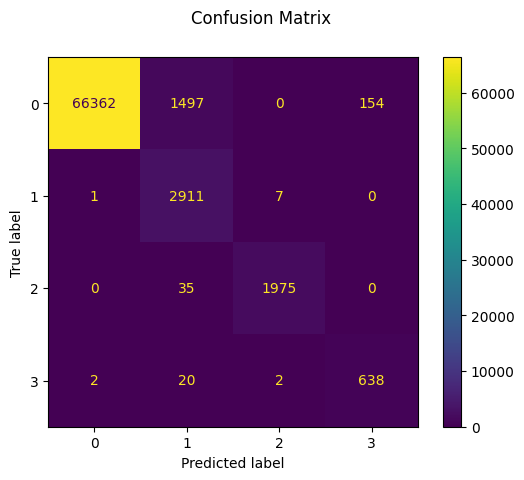

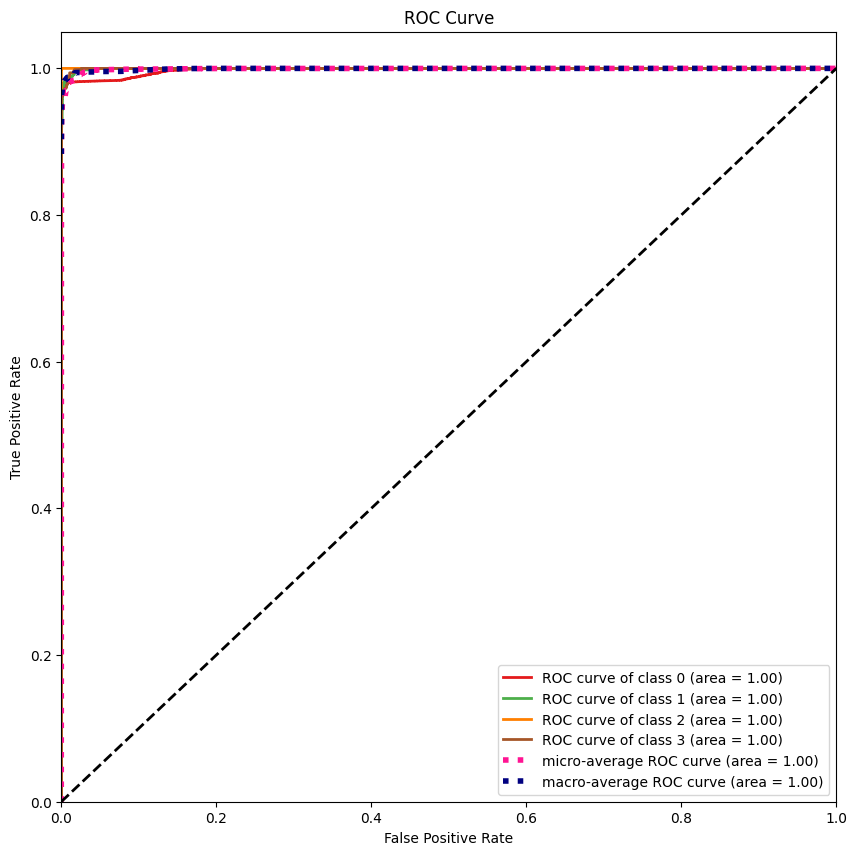

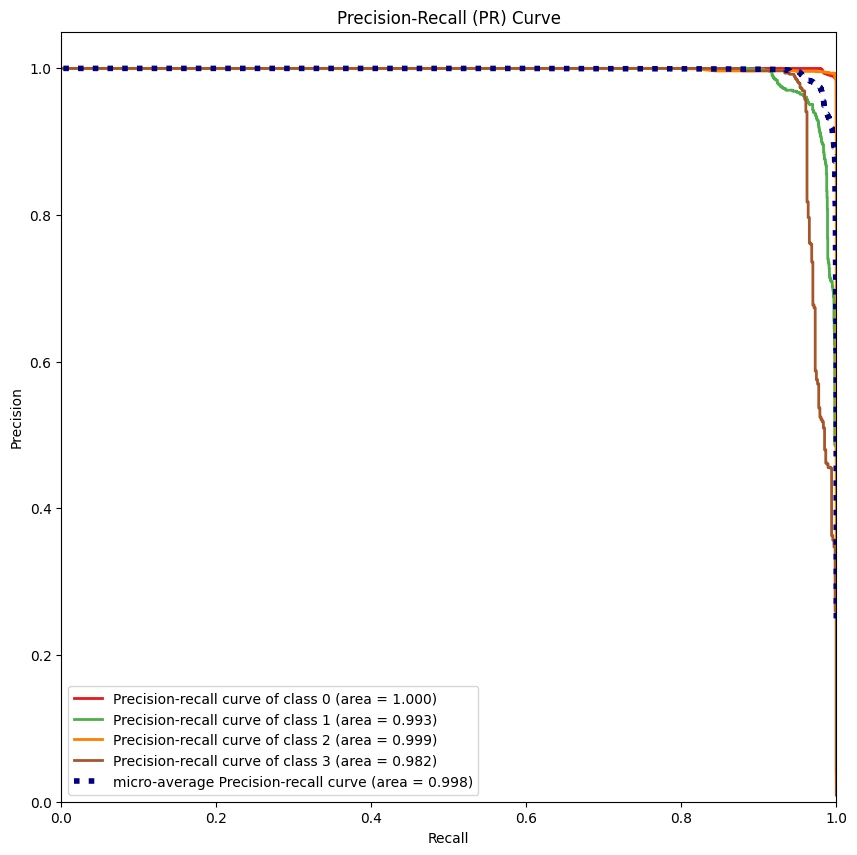

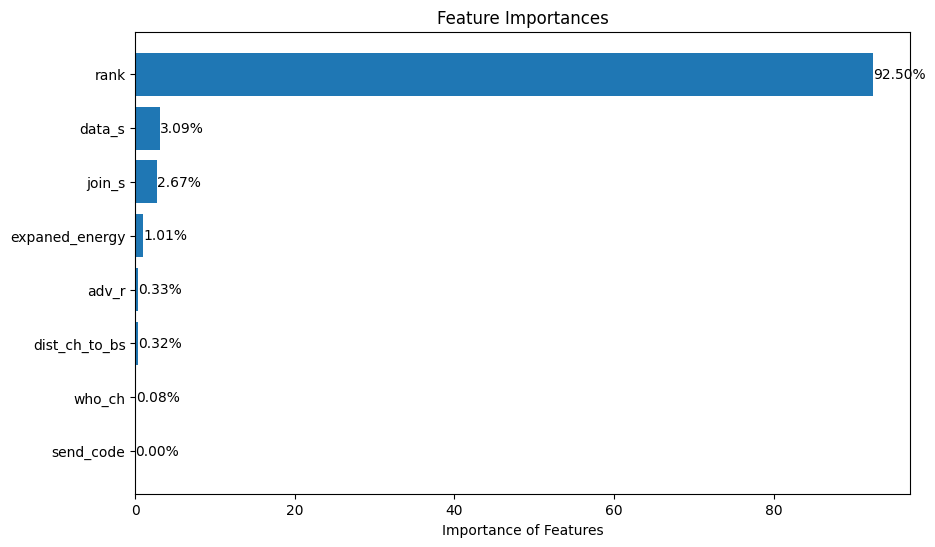






>> ROS

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.38 +- 0.2', 'Recall': '98.49 +- 0.25', 'F1': '98.43 +- 0.21', 'ROC_AUC': '99.94 +- 0.01', 'Log_Loss': '0.0417 +- 0.0038'}

Model Test: {'Precision': "85.53, {'0': 100.0, '1': 65.58, '2': 99.45, '3': 77.09}", 'Recall': "98.04, {'0': 97.54, '1': 99.73, '2': 98.81, '3': 96.07}", 'F1': "90.64, {'0': 98.75, '1': 79.12, '2': 99.13, '3': 85.54}", 'ROC_AUC': '99.93', 'Log_Loss': '0.1302'}



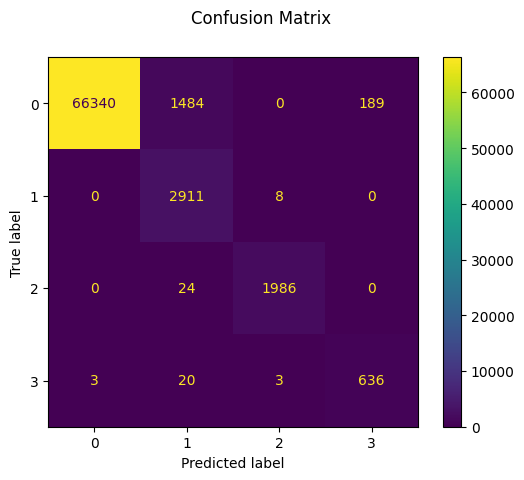

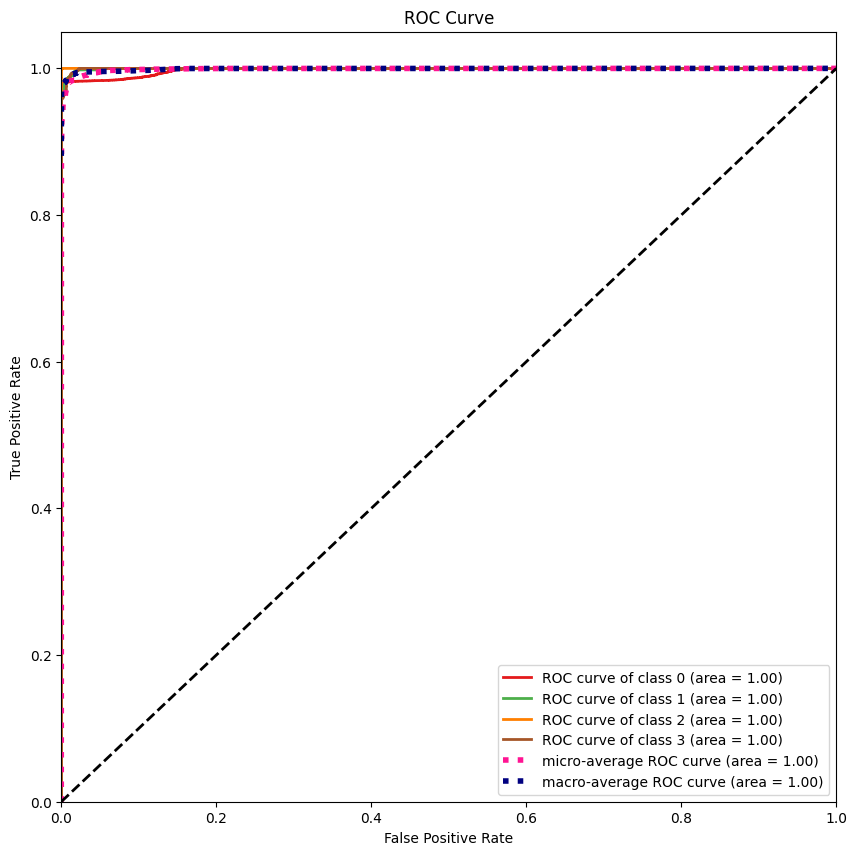

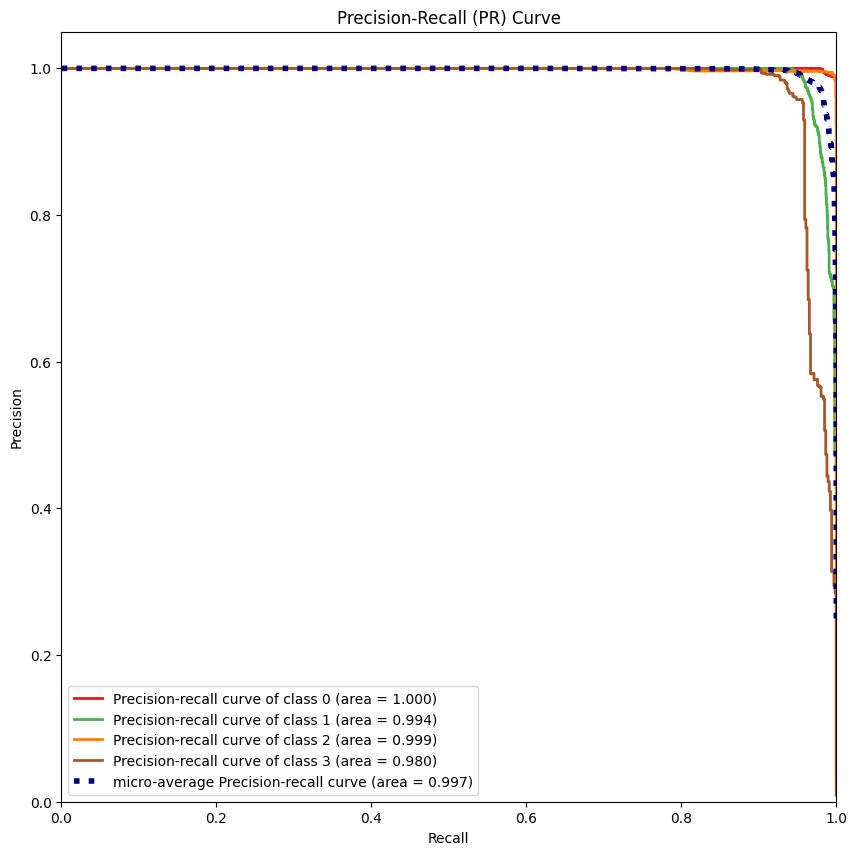

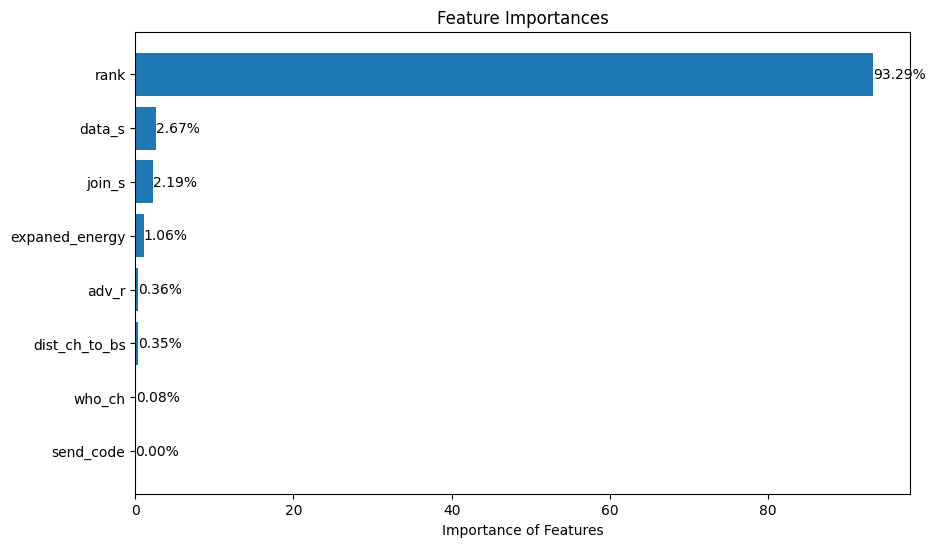






>> SMOTENC

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '98.03 +- 0.17', 'Recall': '97.92 +- 0.19', 'F1': '97.97 +- 0.15', 'ROC_AUC': '99.92 +- 0.01', 'Log_Loss': '0.0524 +- 0.0028'}

Model Test: {'Precision': "84.86, {'0': 100.0, '1': 64.62, '2': 98.8, '3': 76.01}", 'Recall': "97.94, {'0': 97.44, '1': 99.25, '2': 98.41, '3': 96.68}", 'F1': "90.17, {'0': 98.7, '1': 78.28, '2': 98.6, '3': 85.11}", 'ROC_AUC': '99.87', 'Log_Loss': '0.1385'}



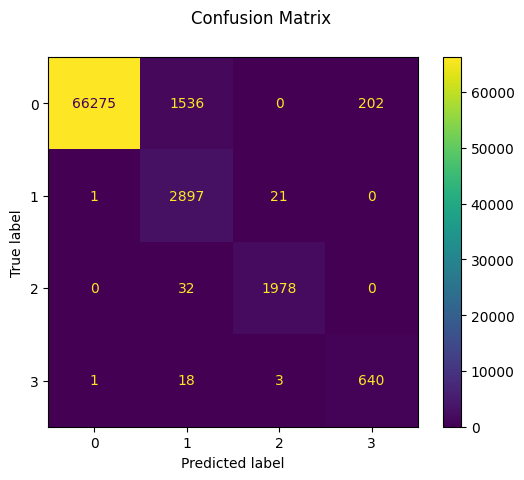

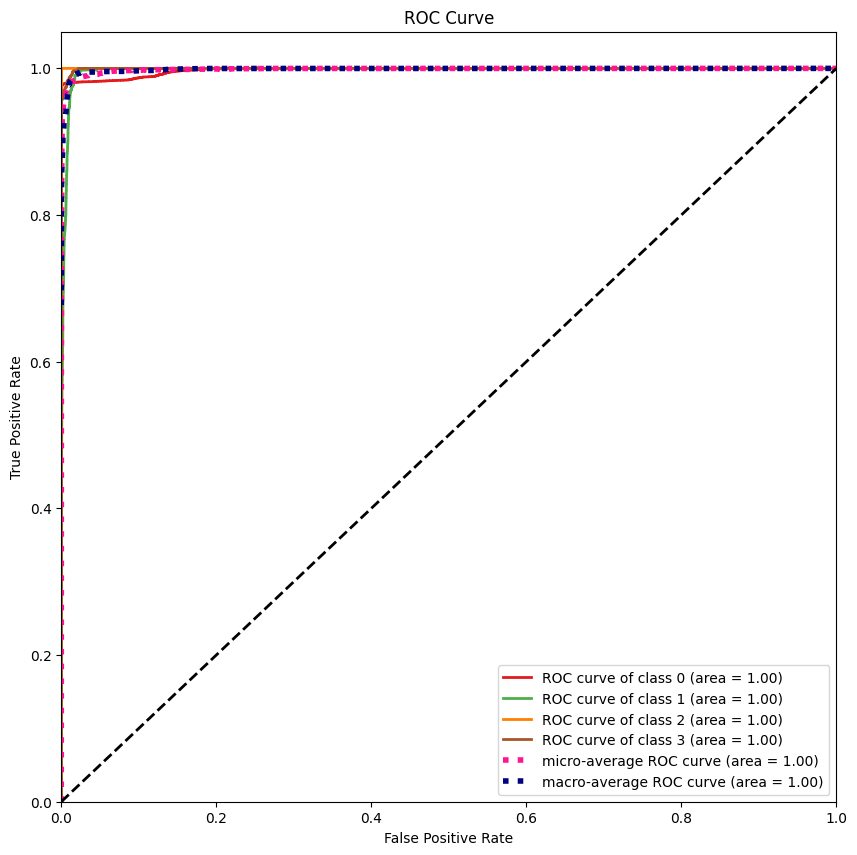

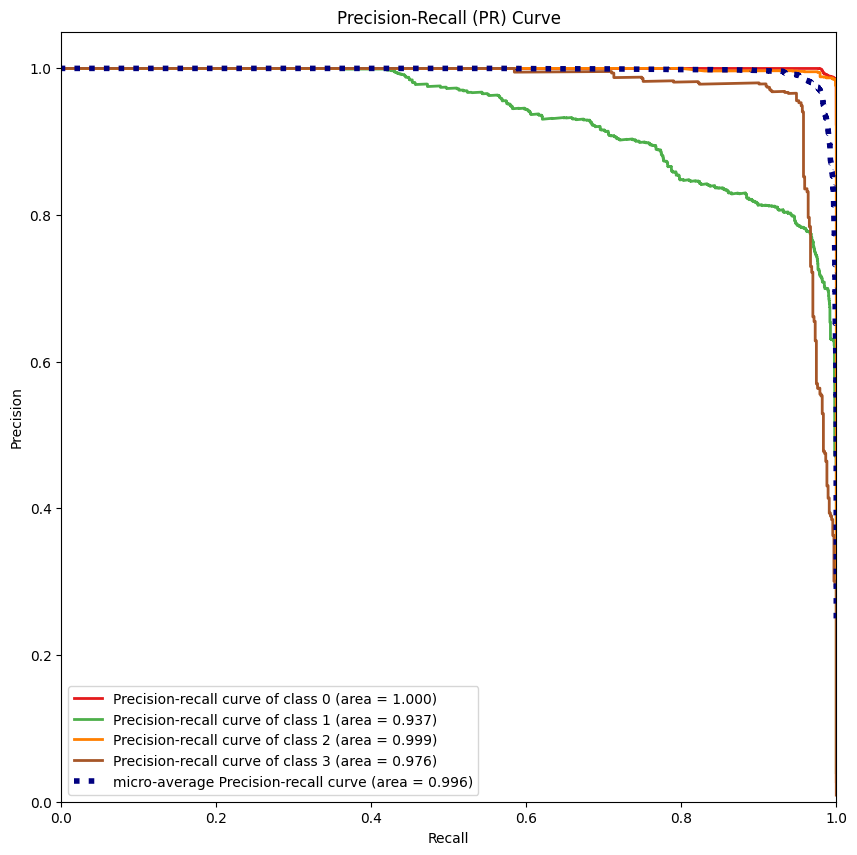

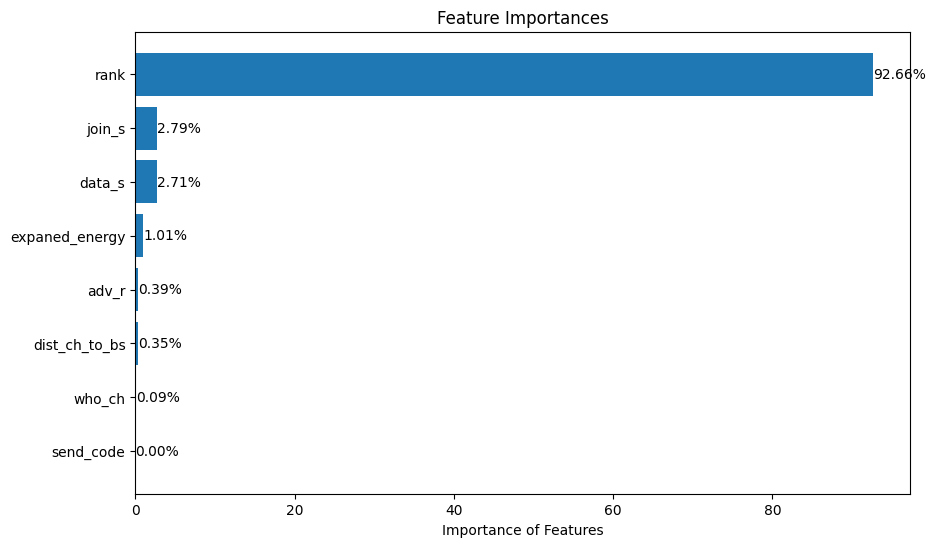






>> CTGAN

[XGBClassifier] Optimizing: 10/10...


Training and Validation: {'Precision': '97.56 +- 0.1', 'Recall': '97.34 +- 0.15', 'F1': '97.45 +- 0.11', 'ROC_AUC': '99.91 +- 0.01', 'Log_Loss': '0.0553 +- 0.0031'}

Model Test: {'Precision': "83.86, {'0': 100.0, '1': 66.34, '2': 99.35, '3': 69.76}", 'Recall': "98.15, {'0': 97.48, '1': 99.59, '2': 99.0, '3': 96.53}", 'F1': "89.63, {'0': 98.72, '1': 79.63, '2': 99.18, '3': 80.99}", 'ROC_AUC': '99.92', 'Log_Loss': '0.1301'}



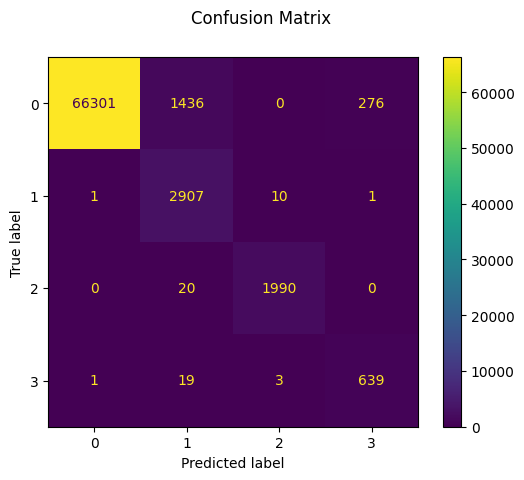

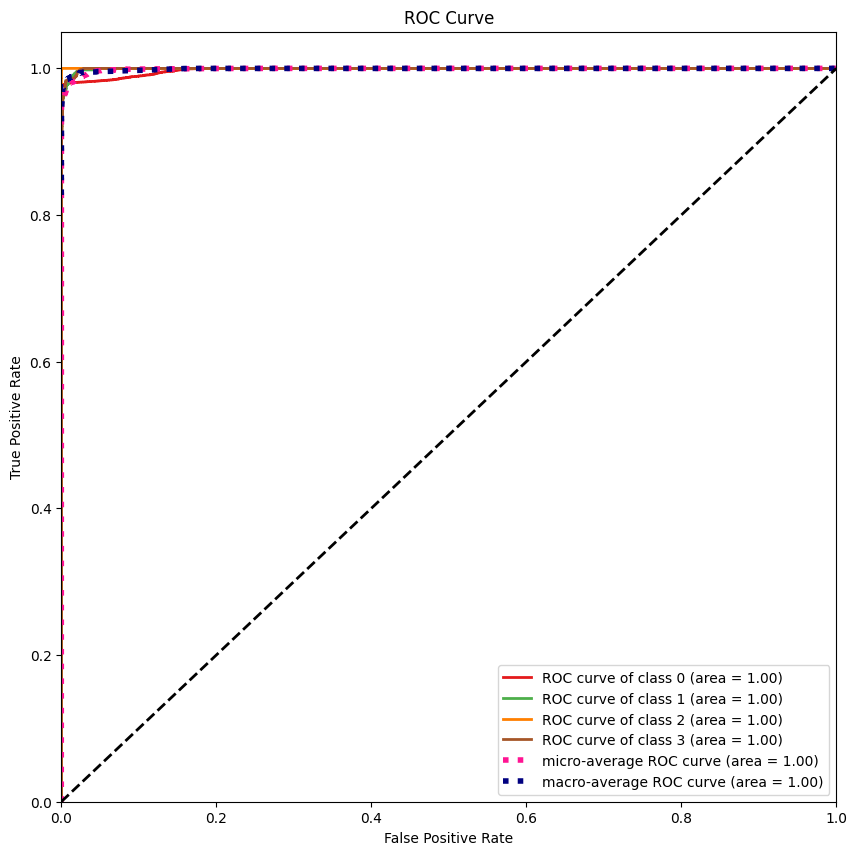

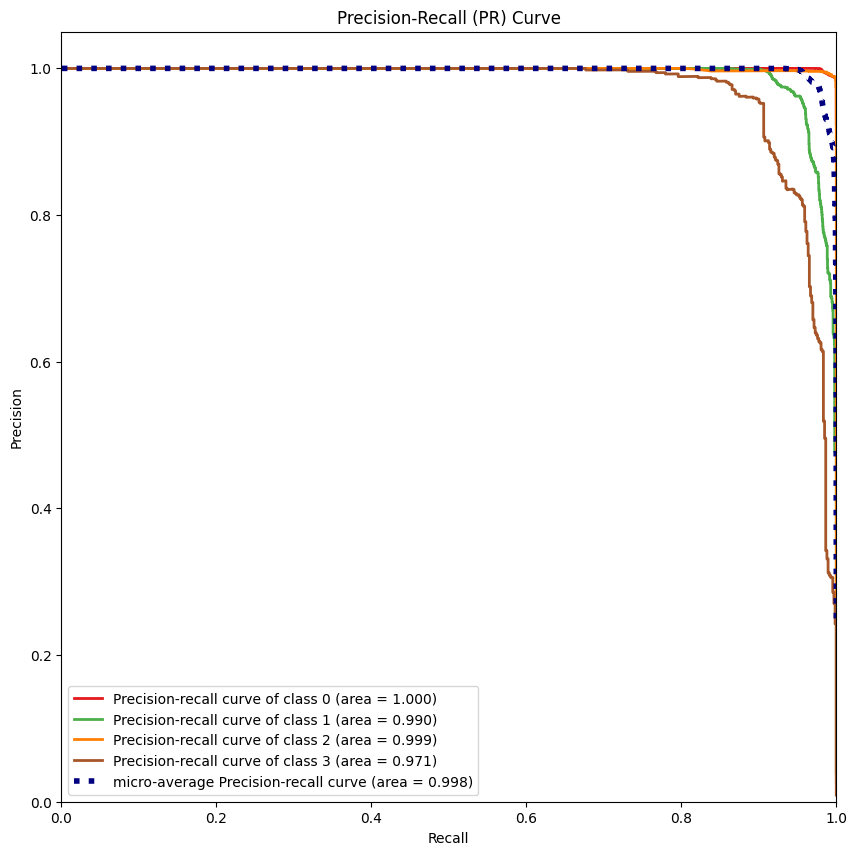

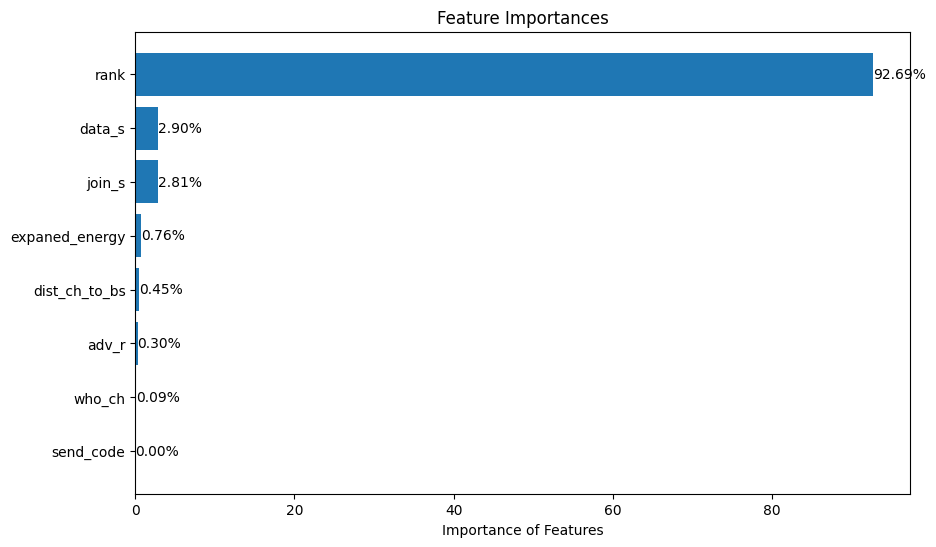

In [9]:
for strategy in ["ONLY_RUS", "ROS", "SMOTENC", "CTGAN"]:  # For each resampling strategy...
    print(f"\n>> {strategy}\n")
    # Split into X and y
    # Select only Boruta features
    X_train, y_train = split_X_y(resampled[strategy]["data"][boruta_features + ["is_target"]], "is_target", [])
    
    # Optimizing hyperparameters...
    model, best_hyperparams, _ = HyperParamXGBoostClassifier(
        X_train, y_train, n_trials=10).run()

    # Cross-Validation with k = 5
    resampled[strategy]["xgb_boruta"]["train_metrics"] = train_validate_model(model, X_train, y_train)
    # Training model...
    model = XGBClassifier(**best_hyperparams, verbosity=0)
    model.fit(X_train, y_train)
    # Model testing
    # Only Boruta features
    resampled[strategy]["xgb_boruta"]["test_metrics"] = test_model(model, X_test[boruta_features], y_test)
    print("\n")
    # ROC and PR Curves
    plot_roc_curve(model, X_test[boruta_features], y_test)
    print("\n")
    plot_pr_curve(model, X_test[boruta_features], y_test)
    # Save trained model
    resampled[strategy]["xgb_boruta"]["obj"] = model
    save_object(resampled[strategy]["xgb_boruta"]["obj"], f"{BIN_PATH}xgb_boruta_{strategy}_obj")
    print("\n")
    
    # Feature Importance
    plot_feature_importances(resampled[strategy]["xgb_boruta"]["obj"], boruta_features, top_n=len(boruta_features))
    # Weights
    plot_weights(resampled[strategy]["xgb_boruta"]["obj"], boruta_features, top_n=len(boruta_features))
    print("\n\n\n")

## 04. Synthesized Results

In [10]:
results = []  # List to save results

for strategy, models in resampled.items():  # Iterate on strategies and models
    for model_name, model_metrics in models.items():
        if model_name not in ["data"]:
            # Add the metrics dictionaries
            results.append({"strategy": strategy, "model": model_name.upper(),
                            "train_metrics": model_metrics.get("train_metrics", {}),
                            "test_metrics": model_metrics.get("test_metrics", {})})
# DataFrame from list
results_df = pd.DataFrame(results)
# Results...
display(results_df)

strategy       model  \
0   ONLY_RUS          RF   
1   ONLY_RUS         XGB   
2   ONLY_RUS         LGB   
3   ONLY_RUS    CATBOOST   
4   ONLY_RUS  XGB_BORUTA   
5        ROS          RF   
6        ROS         XGB   
7        ROS         LGB   
8        ROS    CATBOOST   
9        ROS  XGB_BORUTA   
10   SMOTENC          RF   
11   SMOTENC         XGB   
12   SMOTENC         LGB   
13   SMOTENC    CATBOOST   
14   SMOTENC  XGB_BORUTA   
15     CTGAN          RF   
16     CTGAN         XGB   
17     CTGAN         LGB   
18     CTGAN    CATBOOST   
19     CTGAN  XGB_BORUTA   

                                                                                                                                   train_metrics  \
0     {'Precision': '97.5 +- 0.2', 'Recall': '97.09 +- 0.18', 'F1': '97.29 +- 0.16', 'ROC_AUC': '99.87 +- 0.04', 'Log_Loss': '0.0706 +- 0.0115'}   
1   {'Precision': '97.65 +- 0.25', 'Recall': '97.73 +- 0.23', 'F1': '97.69 +- 0.23', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0482 +- 0.0039'}   
2    {'Precision': '97.75 +- 0.15', 'Recall': '97.9 +- 0.26', 'F1': '97.82 +- 0.19', 'ROC_AUC': '99.94 +- 0.01', 'Log_Loss': '0.0446 +- 0.0037'}   
3     {'Precision': '97.1 +- 0.15', 'Recall': '97.15 +- 0.23', 'F1': '97.12 +- 0.18', 'ROC_AUC': '99.9 +- 0.01', 'Log_Loss': '0.0584 +- 0.0031'}   
4    {'Precision': '97.34 +- 0.22', 'Recall': '97.5 +- 0.19', 'F1': '97.42 +- 0.18', 'ROC_AUC': '99.92 +- 0.01', 'Log_Loss': '0.0521 +- 0.0038'}   
5   {'Precision': '98.29 +- 0.14', 'Recall': '98.09 +- 0.26', 'F1': '98.18 +- 0.18', 'ROC_AUC': '99.91 +- 0.02', 'Log_Loss': '0.0586 +- 0.0094'}   
6   {'Precision': '98.53 +- 0.15', 'Recall': '98.56 +- 0.22', 'F1': '98.54 +- 0.18', 'ROC_AUC': '99.95 +- 0.01', 'Log_Loss': '0.0391 +- 0.0044'}   
7    {'Precision': '98.57 +- 0.17', 'Recall': '98.6 +- 0.17', 'F1': '98.58 +- 0.15', 'ROC_AUC': '99.95 +- 0.01', 'Log_Loss': '0.0383 +- 0.0031'}   
8     {'Precision': '97.96 +- 0.1', 'Recall': '97.96 +- 0.17', 'F1': '97.95 +- 0.11', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.054 +- 0.0031'}   
9    {'Precision': '98.38 +- 0.2', 'Recall': '98.49 +- 0.25', 'F1': '98.43 +- 0.21', 'ROC_AUC': '99.94 +- 0.01', 'Log_Loss': '0.0417 +- 0.0038'}   
10   {'Precision': '97.93 +- 0.11', 'Recall': '97.64 +- 0.2', 'F1': '97.78 +- 0.08', 'ROC_AUC': '99.88 +- 0.02', 'Log_Loss': '0.0725 +- 0.0083'}   
11  {'Precision': '98.06 +- 0.19', 'Recall': '97.97 +- 0.18', 'F1': '98.01 +- 0.14', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0494 +- 0.0031'}   
12   {'Precision': '98.14 +- 0.11', 'Recall': '98.12 +- 0.2', 'F1': '98.13 +- 0.12', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0468 +- 0.0037'}   
13   {'Precision': '97.6 +- 0.14', 'Recall': '97.56 +- 0.28', 'F1': '97.57 +- 0.17', 'ROC_AUC': '99.91 +- 0.01', 'Log_Loss': '0.0598 +- 0.0024'}   
14  {'Precision': '98.03 +- 0.17', 'Recall': '97.92 +- 0.19', 'F1': '97.97 +- 0.15', 'ROC_AUC': '99.92 +- 0.01', 'Log_Loss': '0.0524 +- 0.0028'}   
15   {'Precision': '97.46 +- 0.15', 'Recall': '97.13 +- 0.3', 'F1': '97.29 +- 0.19', 'ROC_AUC': '99.87 +- 0.02', 'Log_Loss': '0.0697 +- 0.0071'}   
16  {'Precision': '97.93 +- 0.14', 'Recall': '97.74 +- 0.21', 'F1': '97.83 +- 0.16', 'ROC_AUC': '99.93 +- 0.01', 'Log_Loss': '0.0471 +- 0.0036'}   
17      {'Precision': '98.0 +- 0.13', 'Recall': '98.01 +- 0.2', 'F1': '98.0 +- 0.13', 'ROC_AUC': '99.94 +- 0.01', 'Log_Loss': '0.043 +- 0.0027'}   
18   {'Precision': '97.52 +- 0.1', 'Recall': '97.35 +- 0.26', 'F1': '97.43 +- 0.18', 'ROC_AUC': '99.91 +- 0.01', 'Log_Loss': '0.0573 +- 0.0026'}   
19   {'Precision': '97.56 +- 0.1', 'Recall': '97.34 +- 0.15', 'F1': '97.45 +- 0.11', 'ROC_AUC': '99.91 +- 0.01', 'Log_Loss': '0.0553 +- 0.0031'}   

                                                                                                                                             test_metrics  
0   {'Precision': '84.22, {'0': 99.99, '1': 69.7, '2': 95.14, '3': 72.06}', 'Recall': '98.22, {'0': 97.69, '1': 99.69, '2': 99.25, '3': 96.22}', 'F1':

In [11]:
# Save results DataFrame
results_df.to_csv(f"{REPORTS_PATH}training_results.csv", index=False)